# Data Mining



In [ ]:
# Load libraries
import numpy as np
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
data = load_wine()
# Configuring pandas to show me every feature
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

# ----------
# Task 1a
# ----------
# First, I check the data types in DataFrame (found: float64 and int64):
#result = df.dtypes
#print("Result:")
#print(result)

# When deciding if a feature is categorical, I begin by looking for
# float types. The below line of code allows me to see this (boolean representation).
# But this does not yet tell me if a feature is categorical:
#df.eq(df.astype(float)).all()

# I then check that for any feature, if there are 'x' number of categories, I might class the feature as categorical.
# The below line of code checks that if the data type is float, it must also be unique. This way we can have a
# limit of, for example, 30 which means if for a feature there are more than 30 possible values, the feature would
# not be considered categorical:
#df.astype(float).nunique().lt(30) & df.eq(df.astype(float)).all()

# Using 'int' this time:
#df.astype(int).nunique().lt(30) & df.eq(df.astype(int)).all()

# For the wine dataset, we have to accept around 100 unique values before 'Magnesium' appears as True. That is,
# for us to perhaps say it could be categorical.

# For 'Target' I see that values are unique with a limit of 3. This helps confirm that 'target' is categorical.

# The feature 'target' does not suggest 'binary attribute' since we get a third type of value.
# It appears more nominal/categorical where numbers are used to represent.

# The following code lets me see that there are only three types of value for 'target' (0, 1, 2)
# and the frequency of each value (Series.value_counts):
#df['target'].value_counts(sort=True)

# ----------
# Task 1b
# ----------

# Univariate summaries
#print('Univariate summaries, mean - with Target feature')
#print(df.mean())

#print('\nUnivariate summaries/mean - excluding Target feature')
#cols = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
#        'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
#        'color_intensity', 'hue', 'od280/od315_of_diluted_wines',
#        'proline']
#print(df[cols].mean())

#print('\nUnivariate summaries, standard deviation - with Target feature')
#print(df.std())

#print('\nUnivariate summaries, standard deviation - excluding Target feature')
#print(df[cols].std())

# Multivariate summaries
#print('\nMultivariate summaries, covariance - with Target feature')
#print(df.cov())

#print('\nMultivariate summaries, covariance - excluding Target feature')
#print(df[cols].cov())

#print('\nMultivariate summaries, correlation - with Target feature')
#print(df.corr())

#print('\nMultivariate summaries, correlation - excluding Target feature')
#print(df[cols].corr())

# ----------
# Task 1c
# ----------

#print('Grouping by Target and computing the median for other features:')
#display(df.groupby('target').median())

# ----------
# Task 1d
# ----------

# When looking for high correlation, we can disregard negative/positive symbols.
# The focus is on if a number is near ±1 or between ±0.50 and ±1
# Also, we need to ignore the diagonal perfect correlations (for example, alcohol to alcohol)
# The pair of numerical features with the highest positive correlation is between: flavanoids and total_phenols
# The pair numerical and categorical (so may disregard) features
# with the highest negative correlation is: flavanoids and target
# Viewing correlations:
#df.corr()

# For removing diagonal values:
#corr = df.corr()
#np.fill_diagonal(corr.values, np.nan)
#print(corr)

# Creating and sorting correlation matrix
#corr_matrix = df.corr(method='pearson')
#sorted_matrix = corr_matrix.unstack().sort_values()
#print(sorted_matrix)

# Creating a scatter plot for 'flavanoids' and 'total_phenols':
#sns.scatterplot(x='flavanoids', y='total_phenols', data=df)
#plt.show()

# And out of curiousity, seeing how a scatter plot would look for 'flavanoids' and 'target':
#sns.scatterplot(x='flavanoids', y='target', data=df)
#plt.show()

# ----------
# Task 2
# ----------

# The country-income.csv file has 10 instances, 4 attributes and 2 missing values
# Missing values are in 'Age' and 'Income', therefore, we must get mean of these fields
df = pd.read_csv('./country-income.csv')
#print('Number of instances = %d' % (df.shape[0]))
#print('Number of attributes = %d' % (df.shape[1]))
#print('Number of missing values:')
#for col in df.columns:
#    print('\t%s: %d' % (col,df[col].isna().sum()))

# Below I find NaN values and fill them with a relavant column mean
#df['Age'] = df['Age'].fillna(df['Age'].mean())
#df['Income'] = df['Income'].fillna(df['Income'].mean())
#df.head(10)

# ----------
# Task 3
# ----------

# I create two dataframes. One containing rows that do not have the 'F' Gender
# field value and another that does not contain the 'M' gender field value
df = pd.read_csv('./shoesize.csv')
df_male = df[df.Gender != 'F']
df_female = df[df.Gender != 'M']
#print(df_male.head(5))
#print(df_female.head(5))

# I then use the new dataframe's shoe size field values and height values
# for making two distinct scatterplot graphs
#print('\nMale Subjects: shoe size/height scatterplot')
#sns.scatterplot(x='Size', y='Height', data=df_male)

#print('\nFemale Subjects: shoe size/height scatterplot')
#sns.scatterplot(x='Size', y='Height', data=df_female)

# Male subjects - Pearson's correlation coefficient of shoe size versus height
#print(df_male['Size'].corr(df_male['Height'], method='pearson'))
# Female subjects - Pearson's correlation coefficient of shoe size versus height
#print(df_female['Size'].corr(df_female['Height'], method='pearson'))

# Inference: I can see that the positive correlation is greater for male subjects. This
# suggests that when considering male subjects, there is a stronger linear relationship
# between height and shoe size. For male subjects, the correlations is:
# 0.7677093547300968 and for female subjects, the correlation is:
# 0.7078119417143995. With both, the data suggests that if a subject's
# height is fairly high, then it is very likely their shoe size would reflect this.
# That said, both scatterplots clearly show some cases where a large shoe size
# still results in the lowest height observed (60). And this appears to be
# the case more often in the scatterplot for females than for male; the scatterplots
# have some plots that are isolated/atypical, but with the male scatterplot,
# it is ultimately easier to observe an upward slope (near linear relationship)

# ----------
# Task 4
# ----------

#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

#from sklearn.pipeline import Pipeline
# followed documentation:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# with SS example: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

# Loading dataset
#WineData = load_wine()
#pca = PCA(n_components=2)
#pca.fit(WineData.data)
# dimensionality reduction
#A = pca.transform(WineData.data)
#print(repr(A))
# Both x and y arguments included using 2D array, 'A'
# colour-coded according to target
# two features
# c=178 elements/samples (ideally, should be visible/no overlaps)
#plt.scatter(A[:, 0], A[:, 1], c=WineData.target)
#plt.show()

# There is quite a lot of overlap, but it is not entirely impossible to
# tell apart the samples and which class they belong to. Considering the 178
# samples, around 60% seem to be distinguishable

# fitting standardscaler instance, using pipeline
# I do the following to normalize (get rid of means) and I see that plots
# become a lot more distinguishable
# I alternate between MinMaxScaler() and StandardScaler() to see that
# SS has a slightly more drastic impact
#B = (Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])).fit_transform(WineData.data)
#C = (Pipeline([('scaler', MinMaxScaler()), ('pca', PCA(n_components=2))])).fit_transform(WineData.data)
#print('SS')
#plt.scatter(B[:,0], B[:,1], c=WineData.target)
#plt.show()
#print('MMS')
#plt.scatter(C[:,0], C[:,1], c=WineData.target)
#plt.show()

In [ ]:
# ----------
# Task 5
# ----------

# First, I will need to prepare X3, X1, and X2. Then, I must get the
# Euclidean distance for the following:
# ~ X3 and X1
# ~ X3 and X2
# This will help me with deciding whether X3 is closer to X1 or X2
# I have found a function and learnt about what arguments it would take
# based on what I must use it for here:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

#X1 = np.array((1, 2))
#X2 = np.array((-1, 0))
#X3 = np.array((3, 2))
#X3_X1_EuclideanDistance = np.linalg.norm(X3 - X1)
#X3_X2_EuclideanDistance = np.linalg.norm(X3 - X2)

# ED between X3 and X1 is 2.0
# ED between X3 and X2 is 4.47213595499958
# This tells me that X3 is closer to X1 meaning the classifier would
# assign X3 to X1, that is, 1 because the class of X1 is Y1=1
#print(X3_X1_EuclideanDistance)
#print(X3_X2_EuclideanDistance)
import numpy as np

# Now considering X4:
X5 = np.array((-1, 3))
X4 = np.array((1, 1))
X6 = np.array((2, 7))
X4_X1_EuclideanDistance = np.linalg.norm(X4 - X6)
X4_X2_EuclideanDistance = np.linalg.norm(X4 - X5)

# X1 and X2 are equally distant (euclidean) from X4: 1.4142135623730951
# For me, this just shows how KNN is not perfect and in real world application
# it could be a problem for when making a decision between tied options that
# might have quite different outcomes/impact
print(X4_X1_EuclideanDistance)
print(X4_X2_EuclideanDistance)

# I can see how randomly selecting X1 (1) or X2 (0) may be a solution or simply
# like scikit which chooses based on ordering. However, as we have allowed the
# number of votes for two classes to be equal, we might instead look at having
# three neighbours (odd number) so ties may be avoided.

6.082762530298219
2.8284271247461903


In [ ]:
def get_manhattan_distance(p, q):
    # sum of absolute difference between coordinates
    distance = 0
    for p_i,q_i in zip(p,q):
        distance += abs(p_i - q_i)

    return distance
# check the function
c1 = (-1, 3)
c2 = (1, 1)
x = (2,7)
# distance b/w a and b
d = get_manhattan_distance(c1, x)
d2 = get_manhattan_distance(c2, x)
# display the result
print(d)
print(d2)

7
7


# Assignment Two: Data Mining

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori

# Task 1
dataset = [['Strawberry', 'Grapes', 'Cheese', 'Watermelon', 'Chocolate', 'Yogurt'],
           ['Salmon', 'Grapes', 'Cheese', 'Watermelon', 'Chocolate', 'Yogurt'],
           ['Strawberry', 'Apple', 'Watermelon', 'Chocolate'],
           ['Strawberry', 'Chicken', 'Grapes', 'Watermelon', 'Yogurt'],
           ['Chicken', 'Grapes', 'Salmon', 'Watermelon', 'Cherry', 'Chocolate']]

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)

df = pd.DataFrame(te_ary, columns=te.columns_)
#display(df)

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
display(frequent_itemsets)

,support,itemsets,length
0,0.8,(Chocolate),1
1,0.8,(Grapes),1
2,0.6,(Strawberry),1
3,1.0,(Watermelon),1
4,0.6,(Yogurt),1
5,0.6,"(Grapes, Chocolate)",2
6,0.8,"(Watermelon, Chocolate)",2
7,0.8,"(Watermelon, Grapes)",2
8,0.6,"(Grapes, Yogurt)",2
9,0.6,"(Watermelon, Strawberry)",2


In [ ]:
from mlxtend.frequent_patterns import association_rules


strong_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
#display(strong_rules)
#display(frequent_itemsets)


# One rule is used from the collection of strong rules
oneRule = strong_rules.loc[6]
display(oneRule)

def k_one_rule(frequent_itemsets, oneRule):
  antecedents = oneRule.iloc[0]
  consequents = oneRule.iloc[1]
  antecedents_support = oneRule.iloc[2]
  consequents_support = oneRule.iloc[3]

  union_of_ant_and_con = consequents.union(antecedents)
  print("\nAntecedents union Consequents", union_of_ant_and_con, "\nAntecedents", antecedents, "\nConsequents", consequents,
        "\nAntecedent Support", antecedents_support, "\nConsequents Support", consequents_support)

  row_num_count = -1
  for i in frequent_itemsets['itemsets']:
    row_num_count+=1
   # Looking for corresponding itemset in frequent_itemsets and extracting once found using row number
    if ((len(i.difference(union_of_ant_and_con)) == 0) & (len(union_of_ant_and_con.difference(i)) == 0)):
      sup_AuB = frequent_itemsets['support'].iloc[row_num_count]
      sup_AuB_div_antecedents_support = sup_AuB/antecedents_support
      sup_AuB_div_consequents_support = sup_AuB/consequents_support
      addition = sup_AuB_div_antecedents_support + sup_AuB_div_consequents_support
      half_value = 0.5
      Kulczynski_measure = half_value*addition
      print("Kulczynski_measure")
      return Kulczynski_measure

print(k_one_rule(frequent_itemsets, oneRule))
'''
KM value returned by function = 0.875
Checking with method 1 (not used in function):
(0.6/2)*((1/0.8)+(1/0.6)) = 0.875

Checking with method 2:
(0.5)*[( 0.6/0.8 ) + ( 0.6 / 0.6 )] = 0.875

'''

antecedents           (Grapes)
consequents           (Yogurt)
antecedent support         0.8
consequent support         0.6
support                    0.6
confidence                0.75
lift                      1.25
leverage                  0.12
conviction                 1.6
Name: 6, dtype: object


Antecedents union Consequents frozenset({'Grapes', 'Yogurt'}) 
Antecedents frozenset({'Grapes'}) 
Consequents frozenset({'Yogurt'}) 
Antecedent Support 0.8 
Consequents Support 0.6
Kulczynski_measure
0.7499999999999999
1.0
0.6
0.875


'\nKM value returned by function = 0.875\nChecking with method 1 (not used in function): (0.6/2)*((1/0.6)+(1/1)) = 0.8 (KM)\n\nChecking with method 2:(0.5)*[( 0.6/0.8 ) + ( 0.6 / 1 )] = 0.8 (KM)\n\nMethod 1: \nkulc(A, B) = (sup(AB) / 2) * ( (1/sup(A))  + (1/sup(B)) ) \nMethod 2: \nkulc(A, B) = (0.5)* [( sup(A union B) / sup(A) ) + ( sup(A union B) / sup(B) )]\n\n\n'

In [ ]:
# Task 2
'''
One method to get imbalance ratio is by using the following:
[AbsoluteValueOf: ( sup(A) - sup(B) )] / [sup(A) + (sup(B) - sup(AuB) ]
'''

strong_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
oneRule = strong_rules.loc[4]
print(oneRule)
display(strong_rules)
display(frequent_itemsets)

def imbalance_ratio(frequent_itemsets, oneRule):
  consequents = oneRule.iloc[0]
  antecedents = oneRule.iloc[1]
  antecedents_support = oneRule.iloc[2]
  consequents_support = oneRule.iloc[3]
  union_of_ant_and_con = consequents.union(antecedents)
  row_num_count = -1
  for i in frequent_itemsets['itemsets']:
    row_num_count+=1
    # Looking for corresponding itemset in frequent_itemsets and extracting once found using row number
    if ((len(i.difference(union_of_ant_and_con)) == 0) & (len(union_of_ant_and_con.difference(i)) == 0)):
      sup_AuB = frequent_itemsets['support'].iloc[row_num_count]
      supA_minus_supB = abs(antecedents_support-consequents_support)
      denominator = antecedents_support + (consequents_support - sup_AuB)
      imbalance_ratio = supA_minus_supB/denominator
      return imbalance_ratio

'''
returned IR value by function = 0.25
numerator: 1 - 0.8 = 0.2, absValue = 0.2
denominator: 1 + (0.8-0.8) = 1
numerator/denominator = IR result = 0.2 (0.199999..)
'''
print(imbalance_ratio(frequent_itemsets, oneRule))

antecedents           (Watermelon)
consequents               (Grapes)
antecedent support             1.0
consequent support             0.8
support                        0.8
confidence                     0.8
lift                           1.0
leverage                       0.0
conviction                     1.0
Name: 4, dtype: object


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Grapes),(Chocolate),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Chocolate),(Grapes),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Watermelon),(Chocolate),1.0,0.8,0.8,0.80,1.0000,0.00,1.0
3,(Chocolate),(Watermelon),0.8,1.0,0.8,1.00,1.0000,0.00,inf
4,(Watermelon),(Grapes),1.0,0.8,0.8,0.80,1.0000,0.00,1.0
5,(Grapes),(Watermelon),0.8,1.0,0.8,1.00,1.0000,0.00,inf
6,(Grapes),(Yogurt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
7,(Yogurt),(Grapes),0.6,0.8,0.6,1.00,1.2500,0.12,inf
8,(Strawberry),(Watermelon),0.6,1.0,0.6,1.00,1.0000,0.00,inf
9,(Yogurt),(Watermelon),0.6,1.0,0.6,1.00,1.0000,0.00,inf


,support,itemsets,length
0,0.8,(Chocolate),1
1,0.8,(Grapes),1
2,0.6,(Strawberry),1
3,1.0,(Watermelon),1
4,0.6,(Yogurt),1
5,0.6,"(Grapes, Chocolate)",2
6,0.8,"(Watermelon, Chocolate)",2
7,0.8,"(Watermelon, Grapes)",2
8,0.6,"(Grapes, Yogurt)",2
9,0.6,"(Watermelon, Strawberry)",2


0.19999999999999996


In [ ]:
#Task 3
import itertools

set_of_items = [1, 2, 3] # ...N
count = 0
for i in range(len(set_of_items) + 1):
  for itemset in itertools.combinations(set_of_items, i):
    count+=1
    print(count, itemset) # itemset/subset

print("combinations: ",count-2) # ignore empty itemset and given/identical
print("size: ", set_of_items[-1])
# On the sizes of the itemsets (being subsets), they range from having no value,
# 1 value and all the way to a maximum of N values. In the case of [1,2,3] the
# largest itemset would have 3 values (size/cardinality of 3).

# The total combinations (because order does not matter) value is
# 2^(size of set_of_items)-2 --> (2^N)-2. A subset/itemset would be able to
# contain what is found in set_of_items which is taken into account when considering size.

#soi = {1,2,3}
#soi = {'1': [],'2':[], '3':[]} # set of items containing itemsets with lists

1 ()
2 (1,)
3 (2,)
4 (3,)
5 (1, 2)
6 (1, 3)
7 (2, 3)
8 (1, 2, 3)
combinations:  6
size:  3


In [ ]:
#Task 4
'''
JAN-DEC 2020, mm rainfaill:
Using the maximum likelihood method, we estimate both mean and standard deviation:
'''
# standard deviation and mean
paris_df = pd.DataFrame({'mm_rainfall_paris': [20.95, 22.41, 25.21, 25.78, 28.43, 22.67,
                                         24.55, 5.49, 23.11, 26.42, 23.90, 23.53]})

# 5.780128118009675
print(paris_df['mm_rainfall_paris'].std())

22.70416666666667
print(paris_df['mm_rainfall_paris'].mean())

# difference between mm values and mean
arr = []
for i in paris_df['mm_rainfall_paris']:
  arr.append(i-(paris_df['mm_rainfall_paris'].mean()))

# listing difference with index
idx=-1
for i in arr:
  idx+=1
  print(idx,":", i)


5.780128118009675
22.70416666666667
0 : -1.75416666666667
1 : -0.29416666666666913
2 : 2.5058333333333316
3 : 3.075833333333332
4 : 5.72583333333333
5 : -0.03416666666666757
6 : 1.8458333333333314
7 : -17.21416666666667
8 : 0.40583333333333016
9 : 3.7158333333333324
10 : 1.1958333333333293
11 : 0.8258333333333319


(2517, 2) (2517,)


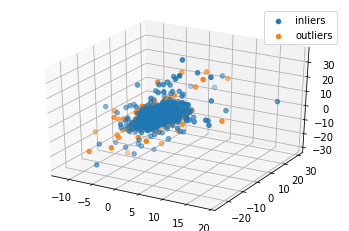

In [ ]:
#Task 5

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

# Load CSV file, set the 'Date' as row's index
stocks = pd.read_csv('stocks.csv', header='infer')
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
#display(stocks)


N,d = stocks.shape
# Compute delta as asked for (percentage of changes in the daily closing price of each stock)
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)

data = delta.values
#print(data)
X, y = data[:, :-1], data[:, -1]
#print(X.shape, y.shape)

from sklearn.svm import OneClassSVM
# Train the one class support vector machine (SVM) model
model = OneClassSVM(nu=0.01,gamma='auto')
yhat = model.fit_predict(X) <0 # Perform fit on input data and returns labels for that input data.
#print(yhat) # Print labels: -1 ('true') for outliers and 1 ('false') for inliers.

#outliers = 0
#inliers = 0
#for i in yhat:
#  if i==True:
#    outliers+=1
#  if i ==False:
#    inliers+=1

#percent = (outliers/(inliers+outliers))*100
#print("percent")
#print(percent)
#print("outliers")
#print(outliers)
#print("inliers")
#print(inliers)

# histogram
from matplotlib import pyplot as plt
import numpy as np

#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#type_of = ['outliers','inliers']
#freqs = [np.count_nonzero(yhat == True),np.count_nonzero(yhat == False)]
#ax.bar(type_of,freqs)
#plt.show()

#plt.bar(0, np.count_nonzero(yhat == True))
#plt.bar(1, np.count_nonzero(yhat == False))
#plt.show()


# Select all rows that are not outliers
mask = yhat != -1
X, y = X[mask, :], y[mask]

# Summarize the shape of the updated dataset
print(X.shape, y.shape)

points = (0,1,2)
showData = data[:, points]
ax = plt.axes(projection='3d')
ax.scatter3D(*showData[~yhat].T, label='inliers')
ax.scatter3D(*showData[yhat].T, label='outliers')
ax.legend()

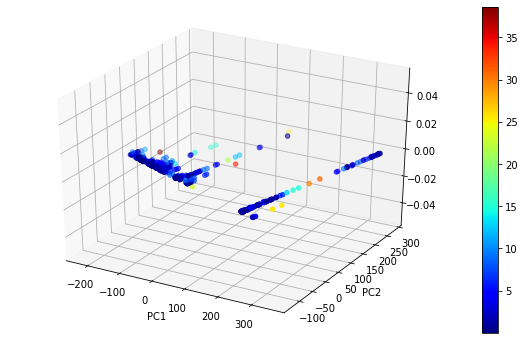

In [ ]:
# Task 6
import matplotlib.pyplot as plt
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps
from scipy.spatial import distance
from pandas import read_csv
# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# Extracting the values from the dataframe
data = df.values
#df.head()

#Applying PCA
#Taking no. of Principal Components as 2
pca = PCA(n_components = 2)
pca.fit(df)
data_pca = pca.transform(df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
#print("head")
#print(data_pca.head())
#print("columns")
#print(data_pca.columns)

from sklearn.neighbors import NearestNeighbors
# Implement a k-nearest neighbour approach using k=4 neighbours
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data_pca.values)
distances, indices = nbrs.kneighbors(data_pca.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(data_pca.PC1,data_pca.PC2,c=outlier_score,cmap='jet')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(p)
plt.show()

In [ ]:
#Task 7
#7a)..

#url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
#html = urlopen(url)

#soup = BeautifulSoup(html, 'lxml')
#print(type(soup))
# Get the title
#title = soup.title
#print(title)
# Print out the text
#text = soup.get_text()
#print(soup.text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'bs4.BeautifulSoup'>
None


ECS766P Data Mining - Week 10
The below table contains income data per country; the same table was used for the Week 3 lab.

Region
Age
Income
Online Shopper


India
49
86400
No


Brazil
32
57600
Yes


USA
35
64800
No


Brazil
43
73200
No


USA
45

Yes


India
40
69600
Yes


Brazil

62400
No


India
53
94800
Yes


USA
55
99600
No


India
42
80400
Yes







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
import requests
import pandas as pd
from bs4 import BeautifulSoup
!pip install requests
!pip install beautifulsoup4

URL = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Income_Table = soup.find("table", {"class": "table table-bordered table-hover table-condensed"})
Table_Headers = []

for header in Income_Table.find_all("th"):
  Table_Headers.append(header.string)
df = pd.DataFrame(columns=Table_Headers)

Regions, Age, Income, OnlineShopper = [],[],[],[]
for row in Income_Table.find_all('tr')[1:]:
  Regions.append(row.find_all('td')[0].string)
  Age.append(row.find_all('td')[1].string)
  Income.append(row.find_all('td')[2].string)
  OnlineShopper.append(row.find_all('td')[3].string)

table_data = {str(Table_Headers[0]): Regions, str(Table_Headers[1]): Age, str(Table_Headers[2]): Income, str(Table_Headers[3]): OnlineShopper}
df = pd.DataFrame(data=table_data)
display(df)

,Region,Age,Income,Online Shopper
0,India,49,86400,No
1,Brazil,32,57600,Yes
2,USA,35,64800,No
3,Brazil,43,73200,No
4,USA,45,None,Yes
5,India,40,69600,Yes
6,Brazil,None,62400,No
7,India,53,94800,Yes
8,USA,55,99600,No
9,India,42,80400,Yes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

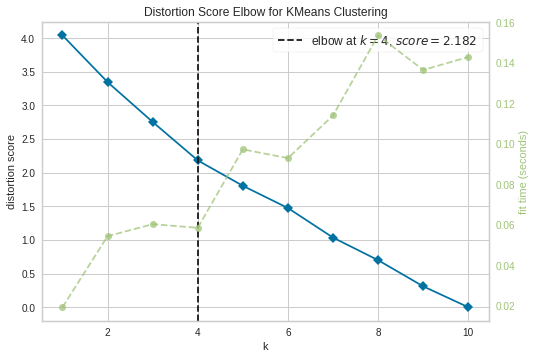

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

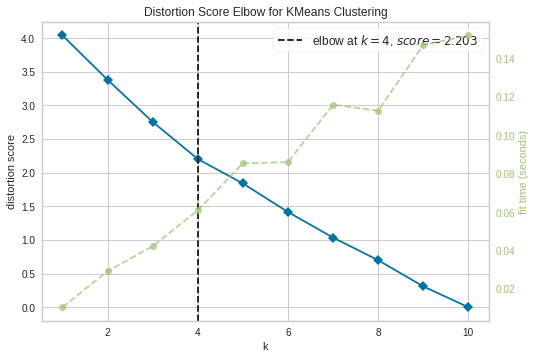

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

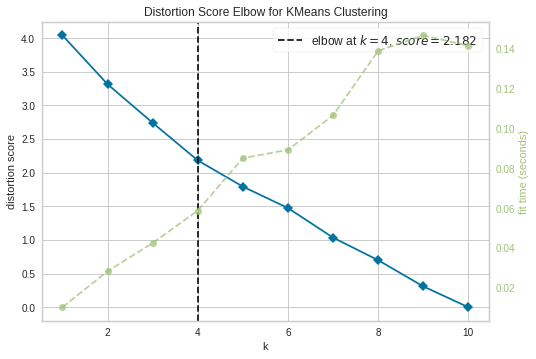

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

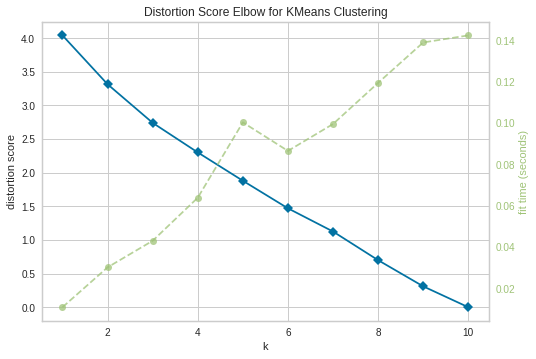

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

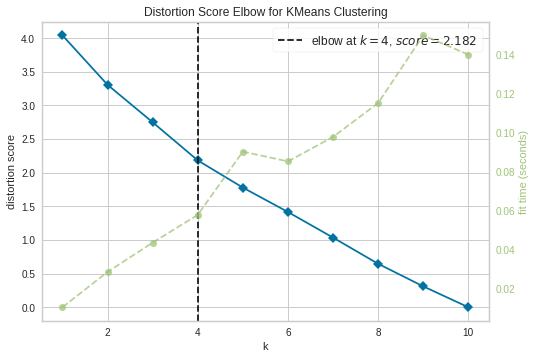

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

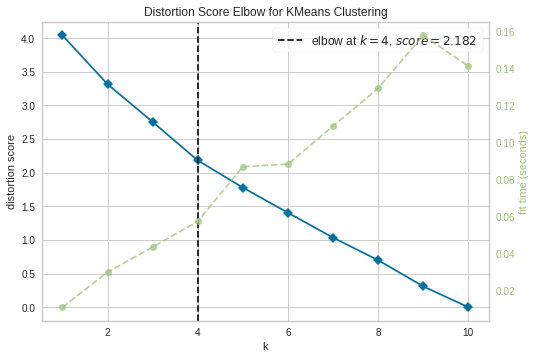

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

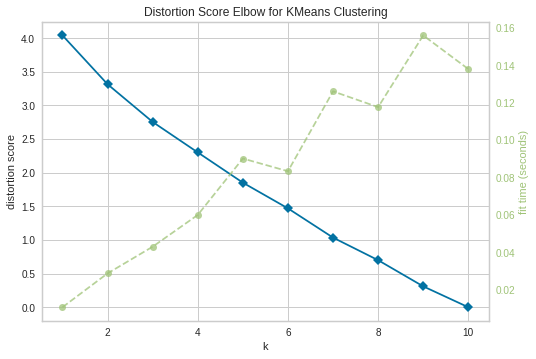

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

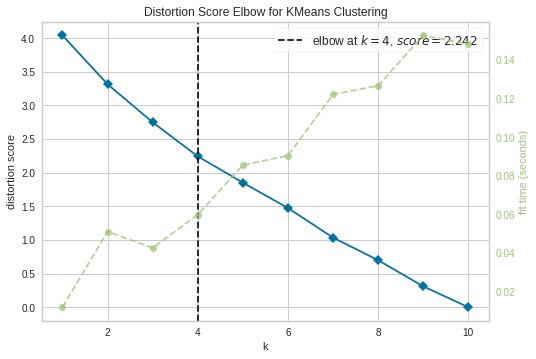

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

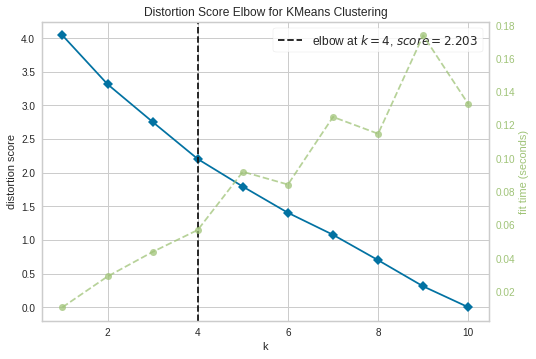

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

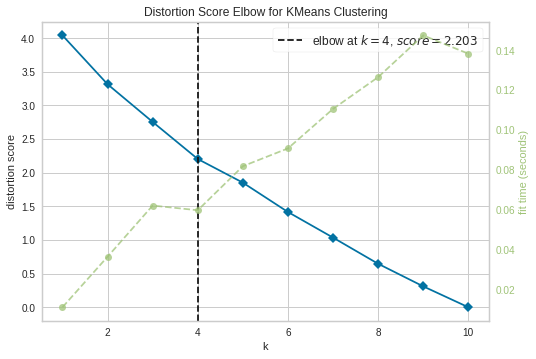

In [ ]:
#Task 8
# Wikipedia has a python library that can be used: https://pypi.org/project/wikipedia/
!pip install wikipedia
import pandas as pd
import wikipedia
import seaborn as sns

articles=['Supervised learning','Unsupervised learning','Semi-supervised learning',
          'Association rule learning','Anomaly detection','Cluster analysis',
          'Dimensionality reduction','Regression analysis',
          'Statistical classification','Data warehouse',
          'Online analytical processing']

list_of_article_contents=[] # this is where pages' content is to be stored
article_titles=[]
for article in articles:
   list_of_article_contents.append(wikipedia.page(article).content)
   article_titles.append(article)

# "Initially, arbitrary vectors µ1,..., µK 2 Rd are chosen as cluster centers" (from data mining lecture 6 slides)
# I create the numeric feature vectors. This is done by using the earlier list made containing article content.
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
A = vec.fit_transform(list_of_article_contents)
# We can see the vectors associated with the articles
#print(A)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
distortion_scores = []
K = range(1,11)
for i in K:
   km = KMeans(n_clusters=i, max_iter=150, n_init=11)
   km = km.fit(A)
   distortion_scores.append(km.inertia_)

# distortion scores per number of clusters
clusters = [1,2,3,4,5,6,7,8,9,10]
sns.scatterplot(x = clusters, y = distortion_scores)
plt.plot(clusters, distortion_scores, '^k:')
plt.xlabel('clusters')
plt.ylabel('distortion_scores')
plt.show()

# I find that the elbow point is when we reach 8 clusters. This is the optimal point.
optimal_clusters = 4
km_model = KMeans(n_clusters=optimal_clusters, max_iter=150, n_init=11)
# fit model to data
km_model.fit(A)
labels=km_model.labels_
labels_list = list(labels)
for i in range(len(article_titles)):
  print(i, "Title: ", article_titles[i], ", K:", labels_list[i])

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(km_model, k=(1,11))
visualizer.fit(A)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Lab session 1: Data

## Introduction

The aim of this lab is for students to familiarise with  **basic exploratory data analysis** of a sample dataset, and more specifically with the concepts of **summary statistics** and **data visualisation** covered in Lecture 2. We will use  the Python's **pandas** package in this **notebook** environment.

<font color = 'maroon'>*This session <ins>is a warm-up that will not count toward your final grade</ins>.*</font>



### Before we start:

This environment that allows us to enter both text and run codes interactively, is a web-based user-friendly environment called [Jupyter notebook](https://jupyter.org/).

There are two types of cells: *Text* and *Code*. You can add your own cells. You can also edit the texts by double-clicking on them. It follows the [markup rules](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

In order to execute (run) a cell, you can use one of the following ways:

0. `Shift + Enter` : executes a cell and goes to the next one.
1. `Ctrl + Enter` : executes a block but stays at the same block. This is equivalent to clicking on the *run* button to the left of the cell, which appears when you hover the mouse over the `[ ]` icon.
2. Use the `Runtime` tab (at the top of the page), which gives you more options as well.

Now, test your knowledge by running the next cell (the output should appear right after):

In [ ]:
for i in range(5):
  print('{:2d} - Welcome to the Data Mining lab!'.format(2**i))

 1 - Welcome to the Data Mining lab!
 2 - Welcome to the Data Mining lab!
 4 - Welcome to the Data Mining lab!
 8 - Welcome to the Data Mining lab!
16 - Welcome to the Data Mining lab!


As you might have noticed, we will be using Python code. Let's have a word on why `Python`?

*Well, for one, it is the most preferred language among data scientist, according to [this poll](https://www.kdnuggets.com/2018/05/poll-tools-analytics-data-science-machine-learning-results.html).
Also it helps that it is a general purpose programming language with a simple syntax. It also has a lot of great open-source libraries -- which, in Python, we call them `packages` -- developed by an active community. If interested, [read more](https://www.cbtnuggets.com/blog/technology/data/why-data-scientists-love-python) on why Python is particularly so popular among data scientist.*

### Some more `notebook` cool tricks:


- You can use the **`tab`** button for auto-completing. You can also use `tab` after a **`dot`** to be shown a drop-down list of the available attributes and methods on an object or a class. For instance, let's create a string object called `mystring` (by executing the first cell), and use the `tab` key after a `dot` to see a list of available attributes and methods for a string object in Python (in the second cell: don't run it, just use the tab key after dot!).

In [ ]:
mystring = 'Hello, World!'

In [ ]:
mystring.

Note that in Python, every variable is an object. Also by now, you should have noticed that we do not need to explicitly declare variables and their types in Python before using them.

Another thing to keep in mind is that objects and functions (runtime variables) persist between different cells in the same notebook session. If you want to clear the memory, you can choose "`Reset all runtimes...`" under the "`Runtime`" tab from the top-left menu.

- Another useful point about the `notebook` environment is that if you want to get help on anything (a method, a function, an object, etc), you can just put a question mark in front of it and execute that line. For instance, let's get help on what the `strip` method does on a string object, by executing the following cell:

In [ ]:
mystring.strip?
# This opens the help on the method "strip" at the bottom of this
# page. You can close the help page after reading it.
# By the way, this is how we designate a comment line in Python!

From now on, we may give a hint about answering a question by putting a question mark in front of a command to open the help page for it for you. Your task is to complete the command.

In [ ]:
print(mystring)
print(mystring.strip())

Hello, World!
Hello, World!


## 1.   Explore the Dataset -- using Python's `Pandas`

Here, we are going to perform some basic *exploratory data analysis* on some sample data.
Data exploration refers to the preliminary investigation of data in order
to better understand its specific characteristics. There are two key motivations for data exploration:
1. To help users select the appropriate preprocessing and data analysis technique used.
2. To make use of humans' abilities to recognize patterns in the data.

The data is about the "cars for sale", which was collected in Summer 2014 from the website _Autotrader.com_,  by one of our MSc student who worked on a data mining project. The data is saved in a CSV file, called **`LondonCars.csv`**.

---
> **Q0:** Why are such files called `CSV`? (Find out what CSV stands for. It may also help to try and open the file using a basic text editor).


> **A0:** CSV stands for comma separated values. Each  value in a csv file is separated by default with a comma. However, other delimiters such as tab ('\t') or whitespace can be used too. Pandas' read_csv method can automatically identify the separator.  
---

### 1.1   Upload the CSV file to this machine.



>-   On the left side of this page, click on the arrow to "Open the left pane".
-   From the "Files" tab, click on `UPLOAD`
- Choose the CSV file that you downloaded from QM+ to your local machine, to be uploaded to *this machine*.

>_Note:_ *By "this machine", we mean the virtual machine that is allocated to your account and running this notebook, hosted by Google Compute Engine. Note that next time you log in, the file may be gone and needs to be re-uploaded, as Google recycles Virtual machines when they are idle for a while.*

### 1.2   Load the dataset from the CSV file:



We will use a package in Python called [pandas](https://pandas.pydata.org/): it has many useful features to work with structured data, and is popular for its ease of use (and as is the case for any Python package, it is [open-source](https://github.com/pandas-dev/pandas)).


So, let's start by reading the csv file into a `pandas' DataFrame`:

(Note that we use **`import`** to (guess what) import a package in Python! We can also assign a different name (alias) to it, usually a shorthand name for convenience. For example, we typically `import pandas as pd`)

Execute the following code block.






In [ ]:
import pandas as pd
df = pd.read_csv('./LondonCars2014.csv')

Let's get more information about the `read_csv` method that we used by executing the following cell:

In [ ]:
pd.read_csv?

---
> **Q1:** You should notice that the command has many options. When these options are not specified, their default values are taken. For example, find out what these default values were for our `read_csv`. Also find out, in particular, what the options `sep`, `header`, `index_col`, `usecols`, `dtype`, `na_values`, and `encoding` do.

> **A1:** You may find the answer to this question by running the above code cell (pd.read_csv?). The default argument values and a description about the arguments will be shown in the Help section on the right hand side.
---

### 1.3   Get general information about the data:



So far, we have read the csv file into a variable we called **`df`**: it is a pandas `DataFrame` object that contains the information in the csv file, along with many useful attributes and methods. For instance, let's print the first few entries along with the column names, to get a quick feeling about the data:


In [ ]:
df.head()

,Make,Model,Year,Mileage,Price,Body Style,Ex Color,In Color,Engine,Transmission,Doors
0,Toyota,Avalon XLE,2014,4725,28995,Sedan,Gray,Black,6 Cyl,Automatic,4
1,Ford,Escape SE,2014,17201,24994,SUV,Silver,Black,4 Cyl,Automatic,4
2,Hyundai,Santa Fe Sport,2014,6279,25998,SUV,Silver,Gray,4 Cyl,Automatic,4
3,Ford,Escape SE,2014,16262,26684,SUV,Black,Black,4 Cyl,Automatic,4
4,Jeep,Grand Cherokee Limited Edition,2014,35572,33440,SUV,Black,Black,6 Cyl,Automatic,4


We still don't know if the data-types are read correctly, we didn't specify them. The `info` method gives us a summary information:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Make          9080 non-null   category
 1   Model         9080 non-null   category
 2   Year          9080 non-null   category
 3   Mileage       9080 non-null   int32   
 4   Price         9080 non-null   int64   
 5   Body Style    9080 non-null   category
 6   Ex Color      9080 non-null   category
 7   In Color      9080 non-null   category
 8   Engine        9080 non-null   category
 9   Transmission  9080 non-null   category
 10  Doors         9080 non-null   category
dtypes: category(9), int32(1), int64(1)
memory usage: 248.0 KB


You should notice that the data-types are not exactly correct. For instance, the type for the `Doors` attribute (column) is inferred as numeric (64-bit integer), but this is wrong (why?).

So let's fix them!

In [ ]:
df = df.astype({'Make':'category', 'Model':'category', 'Year':'category',
                'Mileage':'int32', 'Price':'int64', 'Body Style':'category',
                'Ex Color':'category' , 'In Color':'category',
                'Engine':'category', 'Transmission':'category', 'Doors':'category'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Make          9080 non-null   category
 1   Model         9080 non-null   category
 2   Year          9080 non-null   category
 3   Mileage       9080 non-null   int32   
 4   Price         9080 non-null   int64   
 5   Body Style    9080 non-null   category
 6   Ex Color      9080 non-null   category
 7   In Color      9080 non-null   category
 8   Engine        9080 non-null   category
 9   Transmission  9080 non-null   category
 10  Doors         9080 non-null   category
dtypes: category(9), int32(1), int64(1)
memory usage: 248.0 KB


---
> **Q2:** You should also notice a change between the reported `memory usage` (the last line reported by the `info` method). What is the change? How do you explain the change?

> **A2:** Because google colab has upgraded their python and pandas versions, the data type of 'Doors' column is now correctly identified as 'category' in the first place. In the earlier version of pandas, this was identified as 'int64' data type. Once we convert the data type to category, there should be a reduction in memory usage (since more memory is allocated for an int64 variable). But here we observe no difference.
---



## 2. Basic exploratory questions using Python



Here we compute various summary statistics, which are quantities, such as the mean and standard deviation, that capture various characteristics of a potentially large set of values with a single number or a small set of numbers.


---
> **Q3:** Use the provided hints to answer the questions about exploring your dataset.

> a. How many instances does the dataset have? **9080**

In [ ]:
# hint: interpret the output of the following code:
print(df.shape)

(9080, 11)


> b. How many attributes? **11**

In [ ]:
# again, you can answer the question by interpreting the output of the same code:
print(df.shape)

(9080, 11)


> c. What are the attributes? **['Make', 'Model', 'Year', 'Mileage', 'Price', 'Body Style', 'Ex Color',
       'In Color', 'Engine', 'Transmission', 'Doors']**

In [ ]:
# a pandas dataframe has an attribute called columns:
print(df.columns)

Index(['Make', 'Model', 'Year', 'Mileage', 'Price', 'Body Style', 'Ex Color',
       'In Color', 'Engine', 'Transmission', 'Doors'],
      dtype='object')


> d. What are the possible values for **Body Style** & **External Color**?

In [ ]:
# the "unique" method helps:
print('Possible body styles:')
print(df['Body Style'].unique())

# now your turn, for external colour:
print('Possible external colours:')
print(df['Ex Color'].unique().tolist())

Possible body styles:
['Sedan', 'SUV', 'Hatchback', 'Wagon', 'Coupe', 'Minivan', 'Van', 'Pickup', 'Convertible', 'Chassis']
Categories (10, object): ['Sedan', 'SUV', 'Hatchback', 'Wagon', ..., 'Van', 'Pickup', 'Convertible',
                          'Chassis']
Possible external colours:
['Gray', 'Silver', 'Black', 'White', 'Red', 'Blue', 'Brown', 'Purple', 'Green', 'Gold', 'Orange', 'Beige', 'Yellow', 'Bronze', 'Pink']


> e. What is the *minimum*, *maximum*, *average*, *median* and *standard deviation* price?

In [ ]:
# these are easy, to get the minimum:
print('min = {}'.format(df['Price'].min()))
# now, you do the rest:
print('max = {}'.format(df['Price'].max()))
print('mean = {}'.format(df['Price'].mean()))
print('median = {}'.format(df['Price'].median()))
print('Standard deviation = {}'.format(df['Price'].std()))

min = 1490
max = 499898
mean = 24410.92665198238
median = 21500.0
Standard deviation = 16300.355338946363


> f. Why might the median price be different than the average price? **Because the data distribution is skewed.**

> g. What is the most common year of car? **2011**

In [ ]:
# hint: you can either use the 'mode()' method,
# or the value_counts() along with idxmax()
print(df['Year'].mode())
print(df['Year'].value_counts())

0    2011
Name: Year, dtype: category
Categories (24, int64): [1990, 1993, 1994, 1995, ..., 2012, 2013, 2014, 2015]
2011    2641
2012    2020
2013    1197
2010     750
2008     454
2014     454
2009     393
2007     297
2006     230
2005     198
2004     157
2003     113
2002      49
2000      37
2001      36
1999      20
1997      10
1998       7
1993       6
2015       3
1996       3
1995       2
1994       2
1990       1
Name: Year, dtype: int64


> h. What is the average price of a Honda car and what is the average price of a Mercedes-Benz car? **Hint:** Try $\texttt{df.loc}$.

In [ ]:
# For Honda:
print('Average price of a Honda car = {:.2f}'.format(df.loc[df['Make'] == 'Honda']['Price'].mean()))
# Now you do for Mercedes-Benz:
print('Average price of a Mercedes-Benz car = {:.2f}'.format(df.loc[df['Make'] == 'Mercedes-Benz']['Price'].mean()))

Average price of a Honda car = 18337.49
Average price of a Mercedes-Benz car = 37620.97


> i. What is the ratio of 2-door to 4-door cars? **0.09317**

In [ ]:
# Hint: you can use the output of the value_counts()...
print(df['Doors'].value_counts())
print('The ratio of 2-door to 4-door cars is: {}'.format(df['Doors'].value_counts().loc[2]/df['Doors'].value_counts().loc[4]))

4    8221
2     766
3      93
Name: Doors, dtype: int64
The ratio of 2-door to 4-door cars is: 0.09317601265052913


> j. It is also possible to display the summary for all the attributes simultaneously in a table using the describe() function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.

**<font color="red"></font>**

In [ ]:
df.describe(include='all')

,Make,Model,Year,Mileage,Price,Body Style,Ex Color,In Color,Engine,Transmission,Doors
count,9080,9080,9080.0,9080.000000,9080.000000,9080,9080,9080,9080,9080,9080.0
unique,49,1060,24.0,NaN,NaN,10,15,9,10,2,3.0
top,Nissan,Altima S,2011.0,NaN,NaN,Sedan,Black,Black,6 Cyl,Automatic,4.0
freq,1035,197,2641.0,NaN,NaN,3905,2404,4164,4313,8797,8221.0
mean,NaN,NaN,NaN,41875.531057,24410.926652,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,33146.564303,16300.355339,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1490.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,20112.250000,15987.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,33532.000000,21500.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,52564.500000,28998.000000,NaN,NaN,NaN,NaN,NaN,NaN


Note that count refers to the number of non-missing values for each attribute.

> k. For multivariate statistics, you can compute the covariance and correlation between pairs of attributes.

**<font color="red"></font>**

In [ ]:
print('Covariance:')
df.cov()

Covariance:


,Mileage,Price
Mileage,1.098695e+09,-2.188586e+08
Price,-2.188586e+08,2.657016e+08


In [ ]:
print('Correlation:')
df.corr()

Correlation:


,Mileage,Price
Mileage,1.000000,-0.405068
Price,-0.405068,1.000000


---

## 3. Basic data visualisation using Python


Data visualization is the display of information in a graphic or tabular format. Successful visualization requires that the data (information) be converted into a visual format so that the characteristics of the data and the relationships among data items or attributes can be analyzed or reported.


---
> To display the histogram for the milieage attribute by discretizing it into 8 separate bins and counting the frequency for each bin, run this code:

**<font color="red"></font>**

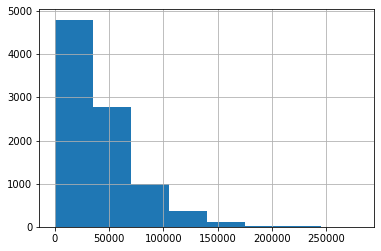

In [ ]:
%matplotlib inline

df['Mileage'].hist(bins=8)

> A boxplot can also be used to show the distribution of values for each attribute.

**<font color="red"></font>**

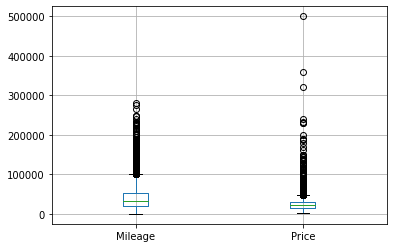

In [ ]:
df.boxplot()

> We can finally plot pairwise relationships in a dataset by running the code below. By default, this function will create a grid of axes such that each numeric variable in our dataset will be shared across the y-axes across a single row and the x-axes across a single column. In the diagonal plots, a univariate distribution plot is drawn to show the marginal distribution of the data in each column. Here scatterplot() is used for each pairing of the variables and histplot() for the marginal plots along the diagonal.

**<font color="red"></font>**

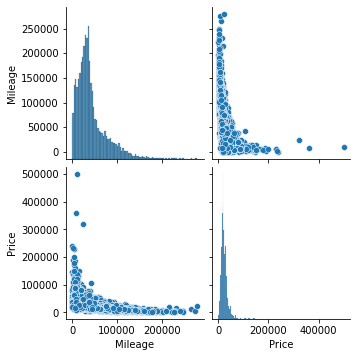

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)

---
> **Q4:** Execute the command above and interpret what the plot is showing. In particular, describe the general trend between `mileage` and `price`, as well as `mileage` and `year`.

**The pairplots will be created only for numeric attributes. Therefore, we first convert the data type of the column "Year" to "int64". Then we use the same code above to obtain the pairplot.**

In [ ]:
df = df.astype({'Make':'category', 'Model':'category', 'Year':'int64',
                'Mileage':'int32', 'Price':'int64', 'Body Style':'category',
                'Ex Color':'category' , 'In Color':'category',
                'Engine':'category', 'Transmission':'category', 'Doors':'category'})

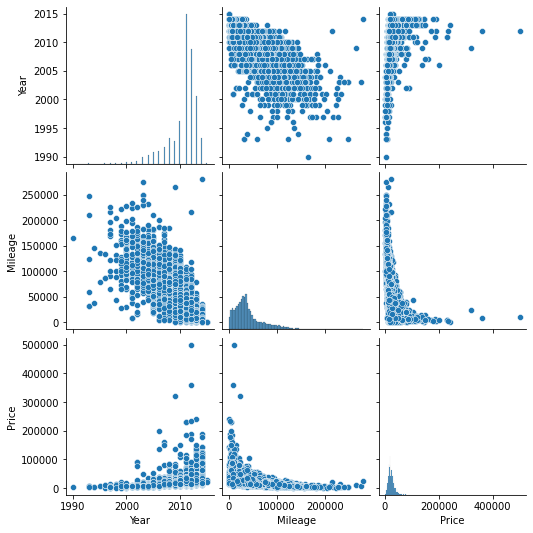

In [ ]:
sns.pairplot(df)

> **A4:** In general, the Milage and Price are uncorrelated. A negative correlation can be observed between Milage and Year.
---

# Lab session 2: Data Preprocessing

## Introduction

The aim of this lab (Lab session 2) is for students to get experience with **Data Preprocessing** covered in lecture 3, and more specifically with the concepts of **handling missing values**, **handling noisy data**, **data normalisation**, **aggregation**, **sampling**, **discretisation**, and **principal component analysis**.



## 1. Data Quality Issues

Poor data quality can have an adverse effect on data mining. Among the common data quality issues include noise, outliers, missing values, and duplicate data. This section presents examples of Python code to alleviate some of these data quality problems. We begin with an example dataset from the UCI machine learning repository containing information about breast cancer patients. We will first download the dataset using the Pandas read_csv() function and display its first 5 data points.

In [ ]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

### 1.1 Missing Values

It is not unusual for an object to be missing one or more attribute values. In some cases, the information was not collected; while in other cases, some attributes are inapplicable to the data instances. This section presents examples on the different approaches for handling missing values.

According to the description of the data (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), the missing values are encoded as '?' in the original data. Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data.

In [ ]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Observe that only the 'Bare Nuclei' column contains missing values. In the following example, the missing values in the 'Bare Nuclei' column are replaced by the median value of that column. The values before and after replacement are shown for a subset of the data points.

In [ ]:
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Instead of replacing the missing values, another common approach is to discard the data points that contain missing values. This can be easily accomplished by applying the dropna() function to the data frame.

In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

### 1.2 Outliers

Outliers are data instances with characteristics that are considerably different from the rest of the dataset. In the example code below, we will draw a boxplot to identify the columns in the table that contain outliers. Note that the values in all columns (except for 'Bare Nuclei') are originally stored as 'int64' whereas the values in the 'Bare Nuclei' column are stored as string objects (since the column initially contains strings such as '?' for representing missing values). Thus, we must  convert the column into numeric values first before creating the boxplot. Otherwise, the column will not be displayed when drawing the boxplot.

Note: Regarding the boxplot:
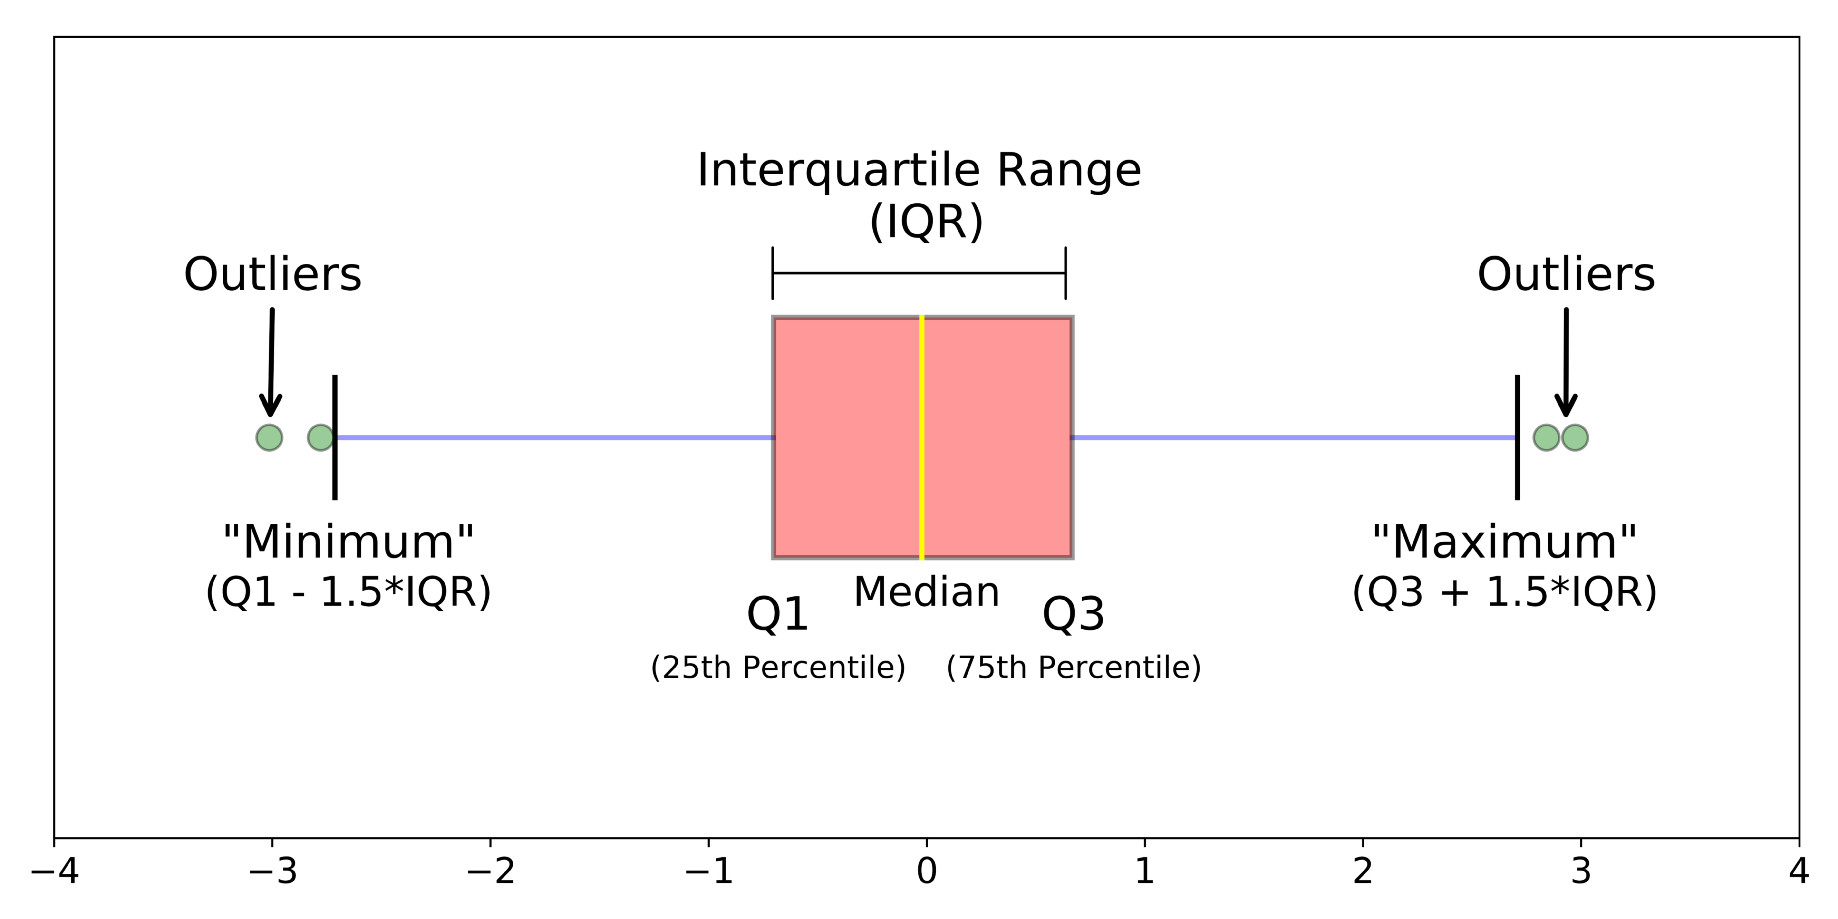

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


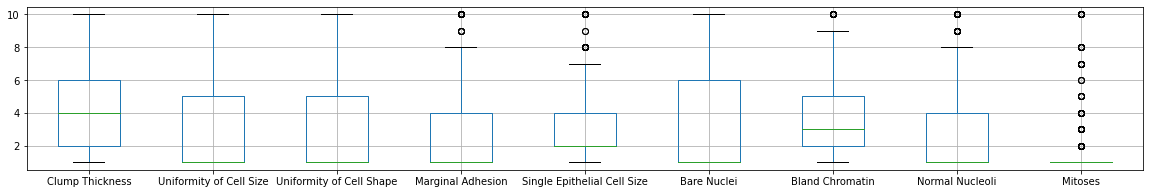

In [ ]:
data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

The boxplots suggest that only 5 of the columns (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).


The following code shows the results of standardizing the columns of the data. Note that missing values (NaN) are not affected by the standardization process.

In [ ]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

The following code shows the results of discarding columns with Z > 3 or Z <= -3.

In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding outlier values = %d' % (Z2.shape[0]))

### 1.3 Duplicate Data

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. The term deduplication is often used to refer to the process of dealing with duplicate data issues. In the following example, we first check for duplicate instances in the breast cancer dataset.

In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

The duplicated() function will return a Boolean array that indicates whether each row is a duplicate of a previous row in the table. The results suggest there are 236 duplicate rows in the breast cancer dataset. For example, the instance with row index 11 has identical attribute values as the instance with row index 28. Although such duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data_deduplicated = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data_deduplicated.shape[0]))

## 2. Aggregation

Data aggregation is a preprocessing task where the values of two or more objects are combined into a single object. The motivation for aggregation includes (1) reducing the size of data to be processed, (2) changing the granularity of analysis (from fine-scale to coarser-scale), and (3) improving the stability of the data.

In the example below, we will use the daily precipitation time series data for a weather station located at Detroit Metro Airport. The raw data was obtained from the Climate Data Online website (https://www.ncdc.noaa.gov/cdo-web/). The daily precipitation time series will be compared against its monthly values.

The code below will load the precipitation time series data and draw a line plot of its daily time series.

In [ ]:
daily = pd.read_csv('DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

Observe that the daily time series appear to be quite chaotic and varies significantly from one time step to another. The time series can be grouped and aggregated by month to obtain the total monthly precipitation values. The resulting time series appears to vary more smoothly compared to the daily time series.

In [ ]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

In the example below, the daily precipitation time series are grouped and aggregated by year to obtain the annual precipitation values.

In [ ]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

## 3. Sampling

Sampling is an approach commonly used to facilitate (1) data reduction for exploratory data analysis and scaling up algorithms to big data applications and (2) quantifying uncertainties due to varying data distributions. There are various methods available for data sampling, such as sampling without replacement, where each selected instance is removed from the dataset, and sampling with replacement, where each selected instance is not removed, thus allowing it to be selected more than once in the sample.

In the example below, we will apply sampling with replacement and without replacement to the breast cancer dataset obtained from the UCI machine learning repository. We initially display the first five records of the table.

In [ ]:
data.head()

In the following code, a sample of size 3 is randomly selected (without replacement) from the original data. </br>
Note: if you run the following code multiple times, then each time you will get a different result.

In [ ]:
sample = data.sample(n=3)
sample

In the next example, we randomly select 1% of the data (without replacement) and display the selected samples. The random_state argument of the function specifies the seed value of the random number generator. </br>
Note:  if you run the following code multiple times, then each time you will get the same result (because of the random_state argument).

In [ ]:
sample = data.sample(frac=0.01, random_state=1)
sample

Finally, we perform a sampling with replacement to create a sample whose size is equal to 1% of the entire data. You should be able to observe duplicate instances in the sample by increasing the sample size.

In [ ]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

## 4. Discretization

Discretization is a data preprocessing step that is often used to transform a continuous-valued attribute to a categorical attribute. The example below illustrates two simple but widely-used unsupervised discretization methods (equal width and equal depth) applied to the 'Clump Thickness' attribute of the breast cancer dataset.

First, we plot a histogram that shows the distribution of the attribute values. The value_counts() function can also be applied to count the frequency of each attribute value.

In [ ]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

For the equal width method, we can apply the cut() function to discretize the attribute into 4 bins of similar interval widths. The value_counts() function can be used to determine the number of instances in each bin.

In [ ]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

For the equal frequency method, the qcut() function can be used to partition the values into 4 bins such that each bin has nearly the same number of instances.

In [ ]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

## 5. Principal Component Analysis

Principal component analysis (PCA) is a classical method for reducing the number of attributes in the data by projecting the data from its original high-dimensional space into a lower-dimensional space. The new attributes (also known as components) created by PCA have the following properties: (1) they are linear combinations of the original attributes, (2) they are orthogonal (perpendicular) to each other, and (3) they capture the maximum amount of variation in the data.

The example below illustrates the application of PCA to an image dataset. There are 16 images (i.e., RGB -Red Blue Green- files; you can get an idea of what is an image [here](https://levelup.gitconnected.com/pixels-arrays-and-images-ef3f03638fe7)), each of which has a size of 111 x 111 pixels. The example code below will read each image file and convert the RGB image into 111 x 111 x 3 = 36963 feature values. This will create a data matrix of size 16 x 36963. The example code below also shows-plots the images.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    filename = 'pics/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

Using PCA, the data matrix is projected to its first two principal components. The projected values of the original image data are stored in a pandas DataFrame object named projected.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected

Finally, we draw a scatter plot to display the projected values. Observe that: all images of burgers are projected to the same region; all images of drinks are projected to the same region; all images of pastas are projected to the same region; however, the images for fried chicken (shown as black squares in the diagram) are harder to discriminate.

In [ ]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

# Lab session 3: Data Exploration and Visualisation

## Introduction

The aim of this lab (Lab session 3) is for students to get experience with **Data Exploration** and **Data Visualisation**, both covered in lecture 4, by using typical Python libraries.


This session starts with a tutorial that uses examples to introduce you to the practical knowledge that you will need for the corresponding assignment. We highly recommend that you read the following tutorials if you need a gentler introduction to the libraries that we use:
- [Numpy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html)
- [Numpy: basic broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- [Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [Seaborn](https://seaborn.pydata.org/tutorial/relational.html)
- [Scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)



## 1 Exploring and visualising the graduation rate dataset


In order to present typical Python functionalities for data exploration and data visualisation, we will use the graduation rate dataset (http://roycekimmons.com/tools/generated_data) as part of a working example.

Note that this is a **synthetic** dataset that presents a familiar setting for the sake of simplicity. Therefore, this dataset should not be used to draw conclusions about students in the real world.

### 1.1 Loading the graduation rate dataset

The graduation rate dataset is stored in a file called ``graduation_rate.csv``, which can be found together with this notebook. You can inspect this file using any text editor. The file contains 1001 lines. The first line contains the name of the features, separated by commas. The remaining lines contain one observation per line. The values for the features of each observation are also separated by lines.

The library ``pandas`` has a convenient function called ``read_csv``, which expects a file that follows the convention described above. This function returns a ``DataFrame``, which represents the data set.

The function ``display`` used within a notebook is similar to the Python function ``print``, but presents a ``DataFrame`` in a much more convenient format. By default, only the first five rows and the last five rows of a large ``DataFrame`` are shown.

This initial inspection reveals that most features are numerical, except for the feature ``parental level of education``, which has multiple text values. In order to display the valid values for this feature, we select the corresponding column from the ``DataFrame``, and use the method ``Series.unique``. This method returns the unique values across a ``Series``.

In [ ]:
# Loading dataset (http://roycekimmons.com/tools/generated_data)
import pandas as pd

df = pd.read_csv('graduation_rate.csv')

print('Dataset (head and tail):')
display(df)

print('\nParental levels of education:')
print(df['parental level of education'].unique())


### 1.2 Pre-processing features

In order to establish a natural ordering over ``parental level of education``, the corresponding column of the ``DataFrame`` is substituted by a column of ordinal features created using the function ``pd.Categorical``.

In [ ]:
education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

df['parental level of education'] = pd.Categorical(df['parental level of education'],
                                                   ordered=True,
                                                   categories=education_order)

display(df['parental level of education'])

### 1.3 Data summarisation

The method ``DataFrame.describe`` can be used to compute most of the univariate summaries that we have covered during the lectures. For each feature, this method computes the mean, standard deviation, minimum, maximum, median, lower quartile, and upper quartile.

Note that ``DataFrame.describe`` detects and omits the categorical feature ``parental level of education``, since those summaries would not be useful. Instead, it is possible to use the method ``Series.value_counts`` to derive the frequency of each value of this feature.

The method ``DataFrame.corr`` can be used to compute the correlation matrix for the (numerical) features in the dataset.

In [ ]:
print('Univariate summaries:')
display(df.describe())
print("Frequency of parental levels of education:")

# relative frequency by dividing with len(df)
freq_education = df['parental level of education'].value_counts()/len(df)
display(freq_education)

print("\nCorrelation coefficients:")
display(df.corr())

### 1.4 Table visualisation

The method ``DataFrame.sort_values`` can be used to sort the rows of a ``DataFrame`` by the value of a specific feature, in ascending or descending order. For instance, we can use this method to sort students by ``college gpa``.

We can also use **slicing** to select a range of observations from a ``DataFrame``. For example, we may sort the students by increasing ``parental income`` and then select the first ten students (with the lowest ``parental income``).

When a ``DataFrame`` is indexed by a list of boolean values that has as many elements as the ``DataFrame`` has rows, only the rows that correspond to ``True`` values are returned. This also works when the list used for indexing is represented by a ``Series``. This functionality can be used to select rows that pass a test based on their features. For example, we may use it to select the students whose parents are educated beyond high school.

The method ``DataFrame.groupby`` provides a simple way to partition observations into groups based on the value of chosen categorical features (for example, ``parental level of education``) and operating independently on each group (for example, computing the mean of the numerical features independently for each group).

In [ ]:
#print(df.to_latex()) # Print a table for use with LaTeX
print('Sorting by college gpa:')
display(df.sort_values(by='college gpa', ascending=False))

print('Selecting the ten students with lowest parental income :')
display(df.sort_values(by='parental income', ascending=True)[0:10])

print('Sorting by high school gpa the students whose parents are educated beyond high school')
# Note that a boolean sequence can be used to index a DataFrame
display(df[df['parental level of education'] > 'high school'].sort_values(by='high school gpa', ascending=False))

print('Grouping by parental level of education and computing the mean for other features:')
display(df.groupby('parental level of education').mean())

### 1.5 Histograms

The library ``seaborn`` provides a high-level interface for drawing appealing graphics using ``matplotlib``.

The following snippet is used to configure the appearance of ``seaborn`` graphics in this notebook.

In [ ]:
%config InlineBackend.figure_formats = set(['retina'])

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

The function ``distplot`` can be used to create a histogram with a specified number of bins for a given column of a ``DataFrame`` (or any list of numbers). For example, it may be used to create a histogram of ``high school gpa`` and ``college gpa``.

In [ ]:
sns.distplot(df['high school gpa'], bins=None, kde=False)
plt.title('Histogram: high school gpa')
plt.show()

In [ ]:
sns.distplot(df['college gpa'], bins=None, kde=False)
plt.title('Histogram: college gpa')
plt.show()

### 1.6 Pie charts

The library ``seaborn`` currently has no function to create pie charts (likely due to the fact that this type of visualisation is often discouraged). The ``matplotlib`` function ``pie`` (``matplotlib.pyplot.pie``) can be used to depict an array of frequencies by a pie chart. For example, we may display the frequencies of ``parental level of education`` computed in the data summarization section.

In [ ]:
plt.pie(freq_education, labels=freq_education.index)
plt.title('Pie chart: parental level of education')
plt.show()

### 1.7 Box Plots

The function ``boxplot`` can be used to create a box plot for a specific feature. For example, it can be used to create a box plot for ``parental income``.

In [ ]:
sns.boxplot(df['parental income'], orient='v')
plt.title('Boxplot: parental income')
plt.show()

The function ``boxplot`` is also capable of grouping observations by a categorical feature and creating one box plot for each resulting group. For example, we may create one box plot of ``parental income`` for each ``parental level of education``.

In [ ]:
ax = sns.boxplot(x='parental level of education', y='parental income', data=df)
plt.title('Boxplot: parental income, grouped by parental level of education')

# Wrap xticks
import textwrap
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

plt.show()


### 1.8 Scatter plots

The function ``scatterplot`` can be used to create a scatter plot for any given pair of features, while the function ``pairplot`` can be used to create a scatter plot matrix.

The resulting points can be coloured according to a categorical feature given by the parameter ``hue``.

In [ ]:
sns.scatterplot(x='ACT composite score', y='SAT total score', data=df)
plt.show()

sns.pairplot(df, hue='parental level of education', diag_kind='hist')
plt.show()

### 1.9 Distance matrices

In order to visualise a distance matrix, it is often important to group the observations in a dataset by a given categorical feature.

For example, we may sort the observations by increasing ``parental level of education``. Because the feature ``parental level of education`` is ordinal but not numerical, we may also decide to remove it from consideration when computing distances between observations.

Furthermore, it is always important to scale different features so that their magnitudes are comparable when computing distances. For example, we may use the ``sklearn`` class ``StandardScaler`` to standardize each feature individually. The method ``StandardScaler.fit_transform`` expects a numpy matrix containing observations across rows and returns a corresponding matrix with standardized features.

In [ ]:
from sklearn.preprocessing import StandardScaler

df_sorted = df.sort_values(by='parental level of education', ascending=True)
parental_education_sorted = df_sorted['parental level of education']

X = df_sorted.drop(columns='parental level of education').to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

The ``scipy`` function ``pdist`` (``scipy.spatial.distance.pdist``) can be used to compute pairwise Euclidean distances between observations in a matrix, while the function ``squareform`` (``scipy.spatial.distance.squareform``) can be used to convert the return of ``pdist`` into the representation that we expect (``pdist`` returns a condensed representation of a symmetric matrix).

Finally, the ``seaborn`` function ``heatmap`` can be used to create a heat map for the corresponding distance matrix (for a chosen colormap).


In [ ]:
from scipy.spatial import distance

dist = distance.squareform(distance.pdist(X))
sns.heatmap(dist, square=True, xticklabels=False, yticklabels=False,
                cmap='Blues')

plt.show()

### 1.10 Dimensionality reduction

The class ``MDS`` from the library ``sklearn`` implements dimensionality reduction through multidimensional scaling. A standardized matrix of observations as the one used to compute the distance matrix in the example above is an appropriate input to the method ``MDS.fit_transform``, which outputs a matrix that contains a two-dimensional point for each observation in the input matrix. A scatter plot can be used to depict this output matrix.

In [ ]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2)

Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'parental level of education': parental_education_sorted})

sns.scatterplot(x='x', y='y', hue='parental level of education', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


The class ``TSNE`` from the library ``sklearn`` implements dimensionality reduction through t-distributed stochastic neighbour embedding (t-SNE). Its interface is analogous to the one provided by the class ``MDS``.

In [ ]:
from sklearn.manifold import TSNE

embedding = TSNE(n_components=2, perplexity=100)

Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'parental level of education': parental_education_sorted})
sns.scatterplot(x='x', y='y', hue='parental level of education', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the example below, each point obtained by t-SNE is coloured according to whether the parents of the corresponding student have a higher education degree.

In [ ]:
df_projection['parents have degree'] = (df['parental level of education'] > 'some college')
sns.scatterplot(x='x', y='y', hue='parents have degree', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 2 Visualising an analytic function

In order to present Python functionalities related to visualising scalar fields and vector fields, we will use the analytic function $f: \mathbb{R}^2 \to \mathbb{R}$ given by $f(x,y) = z = x^2 + y^2$ as a working example.

The ``numpy`` function ``linspace`` can be used to create a list of evenly spaced numbers in a specified interval, while the function ``meshgrid`` can be used to create all possible combinations of numbers from two given lists of numbers.

In our example, the function ``meshgrid`` returns two matrices. The first matrix replicates the numbers of the first list across rows. In our example, this matrix represents positions along the x-axis. The second matrix replicates the numbers of the second list across columns. In our example, this matrix represents positions along the y-axis.

By applying elementwise operations that ultimately combine the two matrices, it is possible to evaluate a function of two variables on every element of a grid defined by the two lists of numbers generated by ``linspace``. The resulting dataset can also be represented by a ``DataFrame``.

In [ ]:
import numpy as np
x_range = np.linspace(-1, 1, 10)
y_range = np.linspace(-1, 1, 10)

# meshgrid: X[i, j] == x_range[j] and Y[i, j] == y_range[i]
X, Y = np.meshgrid(x_range, y_range)

# Z[i, j] == f(x_range[j], y_range[i])
Z = X**2 + Y**2

# Dataset representation
df = pd.DataFrame({'x': X.reshape(-1), 'y': Y.reshape(-1), 'z = f(x,y)': Z.reshape(-1)})
display(df)

### 2.1 Heat maps

The ``matplotlib`` function ``imshow`` can be used to create a heatmap through nearest neighbour interpolation.

In [ ]:
# Interpolation: point (x, y) is colored according to the value z of the nearest point in the dataset
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])

plt.show()

The ``matplotlib`` function ``imshow`` can also be used to create a heatmap through bilinear interpolation.

In [ ]:
# Interpolation: point (x, y) is colored according to the (weighted average) value z of the four nearest points
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='bilinear')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])

plt.show()

### 2.2 Contour plots

The ``matplotlib`` function ``contour`` can be used to create a contour plot.

In [ ]:
CS = plt.contour(X, Y, Z, levels=10, cmap='Blues')
plt.clabel(CS, inline=True, fontsize=10)
plt.show()

### 2.3 Surface plots

The library ``matplotlib`` is also capable of creating (interactive) three-dimensional plots. Surface plots can be created using the function ``plot_surface``.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='Blues', linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

### 2.4 Quiver plots

The ``matplotlib`` function ``quiver`` can be used to create quiver plots. For example, we may use the ``numpy`` function ``gradient`` to approximate the gradient function $\nabla f$ of the scalar field $f$ by the finite differences method, which can then be represented by a quiver plot.

In [ ]:
DY, DX = np.gradient(Z)
plt.quiver(X, Y, DX, DY)
plt.show()

## Exercise



Kaggle has a data-set of cars which can be downloaded  [here](https://www.kaggle.com/CooperUnion/cardataset). The csv file is named data.csv and can also be found in QM+. </br> It contains more than 10,000 rows and more than 10 columns of features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG. </br>
Fill in the code below according to instructions-comments.

In [ ]:
# packages that will be needed

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)


In [ ]:
# 1) load the dataset
df = pd.read_csv("data.csv")

In [ ]:
# 2) check types of features
df.dtypes

In [ ]:
# 3) drop the features: Engine Fuel Type,  Market Category, Vehicle Style, Popularity, Number of Doors and Vehicle Size
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)

In [ ]:
# 4) print number of duplicate rows and then remove them
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df.count()      # Used to count the number of rows before removal

df = df.drop_duplicates()
df.count()      # Used to count the number of rows after removal

In [ ]:
# 5) print how many missing and null values exist per feature and then remove them
print(df.isnull().sum())
df = df.dropna()    # Dropping the missing values
df.count()
print(df.isnull().sum())   # just to check and reassure that they have been dropped

In [ ]:
# 6) compute correlation between the features and then create its heatmap
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Given the above heatmap what can you infer about the feature MSRP (i.e. price)? Do the results seem intuitive?



In [ ]:
# 7) in the steps above there is something that was not taken into account: outliers!
#    create the boxplot for the feature MSRP (i.e. price) and check whether outliers exist
#    remove the outliers of the whole dataset by utilizing the IQR of the boxplot
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

In [ ]:
# 8) compute again the correlation between the features and create its heatmap
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Given the above heatmap (after outliers have been removed), what can you infer now about the feature MSRP (i.e., price)? Which feature is shown to depend on others and this result seems intuitive?

Answer:
In the above heatmap we can see that the price (MSRP) feature depends mainly on the Year, Horsepower, and  Cylinders.

# Lab session 4: Data Warehousing and On-line Analytical Processing

## Introduction

The aim of this lab (Lab session 4) is for students to get experience with **Data Warehousing** and **On-line Analytical Processing (OLAP)** covered in lecture 5, and more specifically with the concepts of **data cubes**, **data cube measures**, **typical OLAP operations**, and **data cube computation**.


## 1. Introduction to Cubes

This chapter describes step-by-step how to use Cubes (http://cubes.databrewery.org/), a lightweight Python framework and set of tools for development of reporting and analytical applications, Online Analytical Processing (OLAP), multidimensional analysis and browsing of aggregated data. We will be working with v1.1 of Cubes. Cubes features:
- a logical view of analysed data - how analysts look at data, how they think of data, not not how the data are physically implemented in the data stores
- OLAP and aggregated browsing (default backend is for relational databse - ROLAP)
- hierarchical dimensions (attributes that have hierarchical dependencies, such as category-subcategory or country-region)
- multiple hierarchies in a dimension
- localizable metadata and data (see Localization)
- authentication and authorization of cubes and their data
- pluggable data warehouse – plug-in other cube-like (multidimensional) data sources

Cubes is meant to be used by application builders that want to provide analytical functionality. Cubes also relies on methods from SQLAlchemy (https://www.sqlalchemy.org/), an open-source SQL toolkit and object-relational mapper for Python.

## 2. Data Preparation

The example data used here is the International Bank for Reconstruction and Development (IBRD) Balance Sheet. For this example we will be using the CSV file "IBRD_Balance_Sheet__FY2010.csv" which is provided in the supplementary material for the lab. The CSV file includes records which are characterised by a Category (and subcategories), Line Item, Fiscal Year, and Amount (in US$ millions). We first start with imports:

In [ ]:
# If you are using Google Colab, you would need to run the below line to install Cubes.
# You can comment the below line if you are running a local python installation with Cubes installed.
!pip install cubes
!pip install sqlalchemy==1.3.20
from sqlalchemy import create_engine
from cubes.tutorial.sql import create_table_from_csv

We can now load the data, create a table and populate it with contents of the CSV file. Note the categories and subcategories created; check the CSV file to link the below commands with the contents of the dataset.

In [ ]:
engine = create_engine('sqlite:///data.sqlite')
create_table_from_csv(engine,
                      "IBRD_Balance_Sheet__FY2010.csv",
                      table_name="ibrd_balance",
                      fields=[
                          ("category", "string"),
                          ("category_label", "string"),
                          ("subcategory", "string"),
                          ("subcategory_label", "string"),
                          ("line_item", "string"),
                          ("year", "integer"),
                          ("amount", "integer")],
                      create_id=True
                     )

## 3. Creating a data cube

Everything in Cubes happens in an *analytical workspace*. It contains cubes, maintains connections to the data stores (with cube data), provides connection to external cubes and more.

The workspace properties are specified in a configuration file slicer.ini (default name). The first thing we have to do is to specify a data store – a database which will host the cube’s data:

In [ ]:
from cubes import Workspace

workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///data.sqlite")

The structure of data cubes (in terms of dimensions, measures, and aggregates) is specified in JSON files. We now import file 'tutorial_model.json' (found in the lab supplementary material) which includes an example model of the data cube, dimension tables, and aggregate functions for the CSV file we loaded previously.

In [ ]:
workspace.import_model("tutorial_model.json")

**Please make sure to inspect the structure of the above JSON file**

We can now create a data cube based on the above data cube model and data table:

In [ ]:
cube = workspace.cube("ibrd_balance")

## 4. Aggregations and OLAP operations

*Browser* is an object that does the actual aggregations and other data queries for a cube. To obtain one:

In [ ]:
browser = workspace.browser(cube)

We can now compute aggregates of the data cube as specified by the data cube model. For computing the total count of records:

In [ ]:
result = browser.aggregate()
result.summary["record_count"]

For computing a sum of the amount:

In [ ]:
result.summary["amount_sum"]

Now we can try to compute aggregates by year:

In [ ]:
result = browser.aggregate(drilldown=["year"])
for record in result:
    print(record)

Or compute aggregates by item category:

In [ ]:
result = browser.aggregate(drilldown=["item"])
for record in result:
    print(record)

We can also perform *slicing* and *dicing* operations on the data cube. The below example performs a slicing operation on the data cube by selecting only entries with the year being 2009, and displays aggregates according to the item category. Here, a *cell* defines a point of interest – portion of the cube to be aggergated or browsed.

In [ ]:
import cubes as cubes
cuts = [cubes.PointCut("year", ["2009"])]
cell = cubes.Cell(cube, cuts)
result = browser.aggregate(cell, drilldown=["item"])
for record in result:
    print(record)

It's worth noting that in Cubes, slicing operations can be created by either specifying a "point cut" which selects a single value of an attribute in a given dimension (called using the cubes.PointCut() function as above), or by specifying a "range cut", which selects a range of values for a given dimension. The range cut can be called using the cubes.RangeCut() function, which takes as input the attribute name, the minimum value of the specified range, and the maximum value of the range.

Similarly, we can perform a *dicing* operation on the data cube by performing a selection on two or more dimensions. The below example performs a dicing operation on the data cube, selecting entries with the year being 2009 and the item category being "a", and displays the aggregate results:

In [ ]:
cuts = [cubes.PointCut("year", ["2009"]),cubes.PointCut("item", ["a"])]
cell = cubes.Cell(cube, cuts)
result = browser.aggregate(cell,drilldown=["item"])
result.summary

We can also *drill down* lower in the Category hierarchy. Here, we perform a dicing operation to select records with year being 2009 and item category being "a" (corresponding to assets), and show aggregates for each subcategory level.

In [ ]:
cuts = [cubes.PointCut("year", ["2009"]),cubes.PointCut("item", ["a"])]
cell = cubes.Cell(cube, cuts)
result = browser.aggregate(cell,drilldown=["item:subcategory"])
for record in result:
    print(record)

</br>

**Exercise**:

Using the same CSV file and data cube in the above lab tutorial: </br>
i) modify the "tutorial_model.json" file to include aggregate measures for the minimum and maximum amount in the data cube; </br>
ii) using these implemented aggregate measures, produce the values for the minimum and maximum amount in the data per year.



  

# Lab session 5: Classification and Clustering

## Introduction

The aim of this lab (Lab session 5) is for students to get experience with **Classification** and **Clustering**, both covered in lecture 6, by using common Python libraries.

## Classification

In order to present functionalities for data classification and clustering in Python, we use the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) as part of a working example.

The dataset is stored in a file called ``mnist.pkl``, which is serialized by [pickle](https://docs.python.org/3/library/pickle.html).

In the snippet below, ``X`` is a matrix (numpy array) where each row corresponds to an observation and each column corresponds to a feature. Each observation is the result of *flattening* a 28 x 28 grayscale image of a handwritten digit into a vector. The list ``y`` (numpy array) contains the class (a digit from 0 to 9) corresponding to each observation (row) in the matrix ``X``.

For the sake of this tutorial, we select only the first 2000 observations (rows) from the original MNIST training dataset to expedite computations.

It is possible to use the ``matplotlib`` function ``imshow`` to visualise any observation by reshaping it appropriately. You may change the index ``i`` to select an observation for visualisation.




In [ ]:
# Configuring the appearance of ``seaborn`` graphics in this notebook
%config InlineBackend.figure_formats = set(['retina'])

import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Selecting the training data from the original dataset
f = open('mnist.pkl', 'rb')
X, y = pickle.load(f, encoding='latin1')[0]
f.close()

# Subsampling
sample_size = 2000
X, y = X[:sample_size], y[:sample_size]

i = 10
plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print('Observation index: {0}. Class: {1}.'.format(i, y[i]))

The library ``sklearn`` implements all the learning algorithms that we covered during the lectures. Each algorithm is implemented by a class that provides a standard interface.

The class ``KNeighborsClassifier`` implements a k-nearest neighbour classification algorithm. The number of neighbours is specified by the constructor parameter ``n_neighbors``.

The method ``KNeighborsClassifier.fit`` is responsible for learning a classifier for a dataset represented by an observation matrix and a class array. This is precisely how our data is represented.

The method ``KNeighborsClassifier.score`` computes the accuracy of a classifier on a specific dataset. This method must be called after ``KNeighborsClassifier.fit``.

As we have seen, a one-nearest neighbour classifier always predicts the correct class for any observation that already exists in a dataset (as long as there are no equal observations with different classes), which is why we obtain 100% accuracy on the training set.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
print('Training dataset accuracy: {0}.'.format(knn.score(X, y)))

In order to evaluate the capacity of a k-nearest neighbour classifier to assign unseen observations to correct classes, it is necessary to split the original dataset into a training dataset and a test dataset.

The ``sklearn`` function ``train_test_split`` can be used for this purpose. This function selects a fraction of the observations (``test_size``) to compose the test set. The parameter ``random_state`` allows reproducibility by fixing the seed used by this (pseudo)random selection procedure.

The function ``train_test_split`` returns a training observation matrix, a test observation matrix, a training class array, and a test class array. From now on, all classifiers are trained without access to the test dataset.

The method ``KNeighborsClassifier.fit`` can be used to fit a k-nearest neighbour classifier to the training dataset. Naturally, the accuracy of the one-nearest neighbour classifier on the training set remains 100%. The accuracy on the test set, however, is a better estimate of the performance of the classifier on unseen data.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Training dataset accuracy: {0}.'.format(knn.score(X_train, y_train)))
print('Test dataset accuracy: {0}.'.format(knn.score(X_test, y_test)))

Training dataset accuracy: 1.0.
Test dataset accuracy: 0.8925.


After a ``KNeighborsClassifier`` is fit, the method ``KNeighborsClassifier.predict`` can be used to predict the classes for a list of observations.

For example, we may use this method to predict the class for every observation in the test dataset. This allows obtaining the indices of the observations that are classified incorrectly.

In [ ]:
y_pred = knn.predict(X_test)
mistakes = np.nonzero(y_pred != y_test)[0]

print('Indices of misclassified observations:')
print(mistakes)

We can use the ``matplotlib`` function ``imshow`` to visualise a misclassified observation. You may change the index for ``mistakes`` in order to select an observation for visualisation (requires running all cells above, because ``y_pred`` is modified later). Note how some misclassifications are understandable.

In [ ]:
i = mistakes[13]
plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print('Observation index: {0}. Class: {1}. Prediction: {2}.'.format(i, y_test[i], y_pred[i]))

Some datasets need to be preprocessed before a learning algorithm can be applied. The training dataset must be preprocessed without access to the test dataset, otherwise the resulting test accuracy after preprocessing is likely to overestimate the accuracy on unseen data.

The function ``make_pipeline`` allows chaining a sequence of preprocessing operations (such as individually standardizing each feature, which is accomplished by the class ``StandardScaler``) before a learning algorithm is applied. This function returns a ``Pipeline`` object that can be used to fit, predict, and score, just as any other classification algorithm in ``sklearn``. A ``Pipeline`` preprocesses incoming data appropriately before making predictions.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

knn_pipe.fit(X_train, y_train)
print('Test dataset accuracy: {0}.'.format(knn_pipe.score(X_test, y_test)))

Consider the task of selecting the best possible number of neighbours k (a hyperparameter) for the k-nearest neighbour classification algorithm.

As we have seen, a hyperparameter should not be chosen based on its performance on the test dataset. In that case, there would be no data left to enable a reliable estimate of how well this choice generalizes to unseen data. After all, this choice would have been based on the test dataset.

Therefore there exist two options: either the whole dataset is split into a training, a validation and a testing set, or k-fold cross validation is performed.

</br>

*Option 1*: **Exercise**

Split the whole dataset into training, validation and testing sets with ratios 65-15-20% and then perform  k-nearest neighbour with k = 5 and 15. Choose the best value for k according to the performance on the validation set.*italicized text*

In [ ]:
# insert code here
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=0)


knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
knn_pipe.fit(X_train2, y_train2)
print('k=1: Test dataset accuracy: {0}.'.format(knn_pipe.score(X_valid, y_valid)))


knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
knn_pipe.fit(X_train2, y_train2)
print('k=5: Test dataset accuracy: {0}.'.format(knn_pipe.score(X_valid, y_valid)))


knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=15))
knn_pipe.fit(X_train2, y_train2)
print('k=15: Test dataset accuracy: {0}.'.format(knn_pipe.score(X_valid, y_valid)))

</br>

Option 2: The function ``cross_validate`` conducts K-fold cross validation using a specified training dataset. Cross-validation involves splitting a training dataset into K folds of equal size (this K and the k in k-nn should not be confused; they are different). Each fold is used as a validation set (on which the performance is computed) when the remaining folds are used as an effective training set (where a classifier is learned). The parameter ``cv`` controls the number of folds K. The function returns a dictionary with statistics that include a list of accuracies (i.e. performance metric) that can be accessed by the keyword ``'test_score'``.

After a hyperparameter is selected by cross-validation, it can be used to fit a classifier to the entire training dataset, which can then be evaluated in the test dataset.

Once again, if any step leading to model selection is based on the resulting performance on the test dataset, the resulting test accuracy is likely to overestimate the accuracy of the model on unseen data.

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_15 = KNeighborsClassifier(n_neighbors=15)

from sklearn.model_selection import cross_validate

# Note that the data was already implicitly shuffled by train_test_split
result_5 = cross_validate(knn_5, X_train, y_train, cv=5)
result_15 = cross_validate(knn_15, X_train, y_train, cv=5)

print('Average accuracy across folds (k = 5): {0}.'.format(result_5['test_score'].mean()))
print('Average accuracy across folds (k = 15): {0}.'.format(result_15['test_score'].mean()))

knn_5.fit(X_train, y_train)
print('Test dataset accuracy (k = 5): {0}.'.format(knn_5.score(X_test, y_test)))

The class ``GridSearchCV`` offers a convenient way to choose hyperparameters based on cross-validation. Its constructor receives a classification algorithm object (such as a ``KNeighborsClassifier`` object) and a dictionary that maps hyperparameter names to lists of values that should be considered. Once the method ``GridSearchCV.fit`` is called, each possible combination of hyperparameters from each of the lists is evaluated using cross-validation. The best hyperparameter setting is then used to fit a classifier to the training dataset. After fitting, the ``GridSearchCV`` object can be used to predict and score just as any other classification algorithm in ``sklearn``.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': [1, 3, 5, 7, 9]}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=5)
knn_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(knn_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(knn_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(knn_cv.score(X_test, y_test)))

Accuracy is not the only classification performance metric available on ``sklearn``. For instance, it is possible to compute the precision and recall for each class by considering the remaining classes as beloging to a single (negative) class. This is accomplished by the function ``precision_recall_fscore_support``.

The function ``confusion_matrix`` creates a confusion matrix given a class/label array and a prediction array.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

y_pred = knn_cv.predict(X_test)

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred)
print('Precision for each class: {0}.'.format(precision))
print('Recall for each class: {0}.\n'.format(recall))

df = pd.DataFrame.from_records(confusion_matrix(y_test, y_pred))
print('Confusion matrix:')
display(df)

As mentioned before, ``sklearn`` implements learning algorithms covered during the lectures:  [support vector machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [artificial neural networks](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), [decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), and [random forest classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

The interface provided by each of these learning algorithms is analogous to the interface provided by the k-nearest neighbour classification algorithm that we have used so far.

For instance, in order to train a random forest classifier composed of 100 decision trees, an object of the class ``RandomForestClassifier`` can be constructed with ``n_estimators`` set to 100. This object can be used to fit the training dataset and compute the accuracy on the test dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))
print('Test dataset accuracy (random forest classifier): {0}.'.format(rfc.score(X_test, y_test)))

</br>

##Exercise##

Train a support vector machine classifier using the same training dataset used in the previous sections and compute its accuracy on the corresponding test dataset. You can use the default hyperparameters for the class SVC from sklearn.svm

In [ ]:
# insert code here
from sklearn import  svm

# Create a classifier: a support vector classifier
clf = svm.SVC()

clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
print('Test dataset accuracy (SVM classifier): {0}.'.format(clf.score(X_test, y_test)))

</br>

##Exercise##


Using the same training dataset used in the previous sections, employ ``GridSearchCV`` to find the best hyperparameter settings based on 5-fold cross-validation for a ``RandomForestClassifier``. Consider ``n_estimators`` $ \in \{ 50, 100, 200\}$ and ``max_features`` $ \in \{0.1, 0.25\}$. Use the default values for the remaining hyperparameters. Compute the accuracy of the best model on the corresponding test dataset.

In [ ]:
# insert code here
parameters = {'n_estimators': [50, 100, 200], 'max_features': [0.1, 0.25]}

rfc = RandomForestClassifier()

rfc_cv = GridSearchCV(rfc, parameters, cv=5)
rfc_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(rfc_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(rfc_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(rfc_cv.score(X_test, y_test)))

</br>

## Clustering

The clustering algorithms implemented by ``sklearn`` have an interface that is similar to the interface for the classification algorithms.

The class ``KMeans`` implements the k-means clustering algorithm. The number of clusters ``n_clusters`` is a parameter for the constructor of this class.

The method ``KMeans.fit_predict`` is equivalent to a call to ``KMeans.fit`` followed by a call to ``KMeans.predict``, which is responsible for attributing each observation to a cluster. After the clustering is computed by a call to ``KMeans.fit``, the sum of squared errors of the clustering is available as a class variable named ``inertia_``.


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
y_pred = kmeans.fit_predict(X)

print('Sum of squared errors (k = 10): {0}.'.format(kmeans.inertia_))

In order to compare the quality of clusterings of the same dataset for different numbers of clusters, it is possible to employ both sums of squared errors and silhouette coefficients.

In [ ]:
from sklearn.metrics import silhouette_score

max_k = 15

# Sum of squared errors for each k
sses = []

# Silhouette coefficient for each k
silhouettes = []

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_pred = kmeans.fit_predict(X)

    sses.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, y_pred))

# Plotting sums of squared errors
df = pd.DataFrame({'sum of squared errors': sses, 'number of clusters': list(range(2, max_k + 1))})
sns.lineplot(x='number of clusters', y='sum of squared errors', data=df)
plt.xticks(df['number of clusters'])
plt.show()

# Plotting silhouette coefficients
df = pd.DataFrame({'silhouette coefficient': silhouettes, 'number of clusters': list(range(2, max_k + 1))})
sns.lineplot(x='number of clusters', y='silhouette coefficient', data=df)
plt.xticks(df['number of clusters'])
plt.show()

A projection computed using t-stochastic neighbor embedding (implemented by the class ``TSNE``) can be used to visualise the results of clustering.

Recall that dimensionality reduction attemps to represent a dataset by a projection such that each point in the projection corresponds to an observation. The t-stochastic neighbor embedding algorithm attempts to preserve neighbourhoods of the dataset in the corresponding projection.

It is important to note that a projection is not, in general, a reliable representation of a dataset. Therefore, care must be taken before deriving conclusions from such visualisations.

Note that the numbers assigned to clusters are unlikely to match the numbers assigned to classes. Therefore, only relative colouring is important in the plots shown below.

In [ ]:
from sklearn.manifold import TSNE

# Computing a projection using t-stochastic neighbour embedding
embedding = TSNE(n_components=2, perplexity=50, random_state=0)
Xp = embedding.fit_transform(X)

# Plotting projection colored by classes
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1], 'class': y})
sns.scatterplot(x='x', y='y', hue='class', palette=sns.color_palette(), data=df_projection)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

kmeans = KMeans(n_clusters=10, random_state=0)
y_pred = kmeans.fit_predict(X)

# Plotting projection colored by clusters
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1], 'cluster': y_pred})
sns.scatterplot(x='x', y='y', hue='cluster', palette=sns.color_palette(), data=df_projection)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Lab session 6: Association Analysis

## Introduction

The aim of this lab (Lab session 6) is for students to get experience with **Association Analysis** covered in week 8, by using typical Python libraries.


This session starts with a tutorial that uses examples to introduce you to  practical knowledge. We highly recommend that you read the following tutorials if you need a gentler introduction to the libraries that we use:
- [Mlxtend: Apriori](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
- [Numpy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html)
- [Numpy: basic broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- [Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [Seaborn](https://seaborn.pydata.org/tutorial/relational.html)
- [Scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

## 1. Frequent itemsets

In order to present functionalities for association analysis in Python, we adapt an example from the ``mlxtend`` documentation.

Consider a dataset composed of five transactions. This dataset is represented by a list of five elements, each of which is a list of items bought during a trip to a supermarket.

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

The library ``mlxtend`` requires that each transaction is represented by a binary vector where each element indicates the presence or absence of a specific item.

The method ``TransactionEncoder.fit_transform`` can be used to convert the dataset created above into this expected format. This method returns a binary matrix (numpy array) where each transaction corresponds to a row and each column corresponds to an item.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te_ary)

The item corresponding to each column is stored by the ``TransactionEncoder`` object in a variable called ``columns_``. This variable can be used to create a ``DataFrame`` that conveniently represents the transaction dataset.

In [ ]:
import pandas as pd

df = pd.DataFrame(te_ary, columns=te.columns_)
display(df)

The ``mlxtend`` function ``apriori`` receives a ``DataFrame`` that represents a transaction dataset and a parameter that specifies the support threshold. This function returns a ``DataFrame`` that contains one row for each frequent itemset. Each row contains a python ``frozenset`` that represents the itemset (by column indices) and a number that represents the support of this itemset.

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.6)
display(frequent_itemsets)

itemset = frequent_itemsets.loc[5]
print('Itemset: {0}. Support: {1}.'.format(itemset['itemsets'], itemset['support']))

Conveniently, if the parameter ``use_colnames`` is set to ``True``,  the ``mlxtend`` function ``apriori`` may instead return a ``DataFrame`` that represents itemsets by ``frozensets`` of item names.

In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
display(frequent_itemsets)

Using typical ``pandas`` functionalities, it is easy to include a column in such a ``DataFrame`` to register the number of items in each frequent itemset, which can be used to filter itemsets by length.

In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) # length of each frozenset
print('Frequent 3-itemsets:')
display(frequent_itemsets[frequent_itemsets['length'] == 3])

It is also easy to create a ``dict`` that maps any frequent itemset (represented by a ``frozenset``) to its support.

In [ ]:
support = {}
for _, row in frequent_itemsets.iterrows():
    support[row['itemsets']] = row['support']

itemset = frozenset(['Onion', 'Eggs'])
print('Itemset: {0}. Support: {1}.'.format(itemset, support[itemset]))

## 2. Association rules

The ``mlxtend`` function ``association_rules`` receives a ``DataFrame`` that represents the set of frequent itemsets and returns a ``DataFrame`` that represents strong association rules for a specified confidence threshold. Each row in the resulting  ``DataFrame`` contains an association rule together with some potentially useful measures (we have not covered lift, leverage, or conviction).

In [ ]:
from mlxtend.frequent_patterns import association_rules

strong_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
display(strong_rules)

## Exercise



The sample dataset to be used is one of Kaggle’s e-commerce resources containing historical sales transactions of electronic items. The dataset can be found in QM+.

The tasks to be completed for this exercise are:

1) Import the dataset </br>
2) Keep only the columns: 'Order ID', 'Product' </br>
3) Reset the index of the dataframe </br>
4) Use the following command for structuring the dataframe into a form/format for analysis: </br> pivot_table(index = 'Order ID', columns = 'Product', aggfunc = 'count') </br>
5) Check the resulting dataframe and perform a necessary pre-processing technique </br>
6) Convert the columns to boolean </br>
7) Identify the support frequency of items </br>
The support frequency is the number of times any individual item is sold (here we only count each item once per order) divided by the total number of transactions (or orders in this example). Which are the top-5 most frequent selling items? Can this insight help a retailer also boost the sales of less frequent selling items by pairing them with these high frequency lower cost electronic goods? Which products would make sense to pair together given this insight? </br>
8) Run the apriori algorithm from mlxtend </br>
9) Compute items that sell at minimum in a percentage of all orders placed in the month (e.g. try min_support=0.00000001) </br>
10) Compute pairs of orders that have a meaningful measure (e.g lift of more than 1; confidence of more than 0.1) in their sales when marketed together





In [ ]:
import numpy as np

sales_april = pd.read_csv('Sales_April_2019.csv')

print('Total item sales (ignoring quanitities)')
print(len(sales_april))
print('Total orders')
print(len(sales_april['Order ID'].value_counts()))
print('Total unique products')
print(len(sales_april['Product'].value_counts()))


sales_filter = sales_april[['Order ID', 'Product']]
sales_filter = sales_filter.reset_index()

df_orders = sales_filter.pivot_table(index = 'Order ID', columns = 'Product', aggfunc = 'count')
#Fill null values in the dataframe
df_orders = df_orders.fillna(0)

#Convert df orders columns to boolean
col_names = df_orders.columns
df_orders = df_orders[col_names].astype('bool')

df_orders.mean().sort_values(ascending=False).plot(kind='bar')

#Run the apriori algorithm from mlxtend
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

#Compute items that sell at min_support = 0.00000001 of all orders placed in the month
frequent_itemsets = apriori(df_orders, min_support = 0.00000001,max_len = 2, use_colnames = True)

#Compute pairs of orders that have a meaningful e.g. lift/confidence of more than 1/0.1 in their sales when marketed together
frequent_itemsets_rules = association_rules(frequent_itemsets,metric = "confidence", min_threshold = 0.1)
display(frequent_itemsets_rules)


# Lab session 7: Outlier Detection

## Introduction

The aim of this lab (Lab session 7) is for students to get experience with **Outlier Detection** covered in week 9, by using typical Python libraries.


This session starts with a tutorial that uses examples to introduce you to the practical knowledge that you will need for the corresponding assignment. We highly recommend that you read the following tutorials if you need a gentler introduction to the libraries that we use:
- [Numpy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- [Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [Scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

## 1. Outlier detection using parametric methods

This approach assumes that the majority of the data instances are governed by some well-known probability distribution, e.g. a Gaussian distribution. Outliers can then be detected by seeking for observations that do not fit the overall distribution of the data.

In this example, our goal is to detect anomalous changes in the daily closing prices of various stocks. The input data **stocks.csv** (available in the lab supplementary material) contains the historical closing prices of stocks for 3 large corporations (Microsoft, Ford Motor Company, and Bank of America).

In [ ]:
import pandas as pd

# Load CSV file, set the 'Date' values as the index of each row, and display the first rows of the dataframe
stocks = pd.read_csv('stocks.csv', header='infer')
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
stocks.head()

We can compute the percentage of changes in the daily closing price of each stock as follows:
\begin{equation}
\Delta(t) = 100 \times \frac{x_t - x_{t-1}}{x_{t-1}}
\end{equation}

where $x_t$ denotes the price of a stock on day $t$ and $x_{t-1}$ denotes the price on its previous day, $t-1$.

In [ ]:
import numpy as np

N,d = stocks.shape
# Compute delta, which denotes the percentage of changes in the daily closing price of each stock
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()

We can now plot the distribution of the percentage daily changes in stock price as a 3-dimensional scatter plot:

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,5)).gca(projection='3d')
fig.scatter(delta.MSFT,delta.F,delta.BAC)
fig.set_xlabel('Microsoft')
fig.set_ylabel('Ford')
fig.set_zlabel('Bank of America')
plt.show()

Let's assume that the data follows a multivariate (i.e. multidimensional) Gaussian distribution. Such a probability distribution can be characterised by two statistics: the mean and covariance matrix of the 3-dimensional data.

We can then compute the mean and covariance matrix of the 3-dimensional 'delta' data (which represent the percentage of changes in the daily closing price of each stock). Then, as a distance measure, to determine the anomalous trading days, we can compute the **Mahalanobis distance** (to be more precise, the square of the Mahalanobis distance) between the percentage of price change on each day against the mean percentage of price change:
\begin{equation}
\textrm{MDist}(x,\bar{x}) = (x - \bar{x})^T S^{-1}(x - \bar{x})
\end{equation}
where $x$ is assumed to be a row vector, $\bar{x}$ denotes the mean vector, and $S$ denotes the covariance matrix of the data.

See Section 12.3 in the "Data Mining: Concepts and Techniques" book for more information on the Mahalanobis distance. As a first step, we can define a function for the Mahalanobis distance:

In [ ]:
from numpy.linalg import inv

def mahalanobis(x=None, data=None):
    """Compute the Mahalanobis Distance between each row of x and the data
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    """
    x_mu = x - np.mean(data)
    cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.matmul(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

Then, we can call the created function for the Mahalanobis distance on the 'delta' dataframe containing the daily percentage changes for each stock:

In [ ]:
# Compute Mahalanobis distance for delta dataset
mahal = mahalanobis(x=delta, data=delta[['MSFT', 'F', 'BAC']])

# Assign an outlier score for the data based on the computed Mahalanobis distance
outlier_score = mahal

# Display 3D scatterplot with datapoints having a different color according to their outlier score
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=outlier_score,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.colorbar(p)
plt.show()

The top outliers are shown as the dark red and orange points in the above scatterplot. We can examine the dates associated with the top-5 highest outlier scores as follows:

In [ ]:
outlier = pd.DataFrame(outlier_score, index=delta.index, columns=['Outlier score'])
result = pd.concat((delta,outlier), axis=1)
result.nlargest(5,'Outlier score')

We see for example that the top outlier was detected for 13th October 2008. This was a period of economic instability due to the 2008 global financial crisis (https://en.wikipedia.org/wiki/Global_financial_crisis_in_October_2008).

We can subsequently inspect stocks around the top-2 outlier dates for each company, and see to which compani(es) are these outliers attributed to.

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

ts = delta[445:452]
ts.plot.line(ax=ax1)
ax1.set_xticks(range(7))
ax1.set_xticklabels(ts.index)
ax1.set_ylabel('Percent Change')

ts = delta[477:484]
ts.plot.line(ax=ax2)
ax2.set_xticks(range(7))
ax2.set_xticklabels(ts.index)
ax2.set_ylabel('Percent Change')

## 2. Outlier detection using proximity-based approaches

This is a model-free outlier detection approach as it does not require constructing an explicit model of the normal class to determine the outlier score of data instances. The example code shown below employs the k-nearest neighbor approach to calculate the outlier score. Specifically, a normal instance is expected to have a small distance to its k-th nearest neighbour whereas an outlier is likely to have a large distance to its k-th nearest neighbour. In the example below, we apply the distance-based approach with k=4 to identify the anomalous trading days from the stock market data described in the previous section.

For more information on the NearestNeighbors() function please see the scikit learn documnetation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

# Implement a k-nearest neighbour approach using k=4 neighbours
knn = 4
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(delta.values)
distances, indices = nbrs.kneighbors(delta.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]

# Plot 3D scatterplot of outlier scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=outlier_score,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.colorbar(p)
plt.show()

The results are slightly different than the one shown in Section 1 due to the difference distance used (Euclidean distance vs Mahalanobis distance) and the proximity criterion to detect the outliers.

We can examine the dates associated with the top-5 highest outlier scores as follows.

In [ ]:
outlier = pd.DataFrame(outlier_score, index=delta.index, columns=['Outlier score'])
result = pd.concat((delta,outlier), axis=1)
result.nlargest(5,'Outlier score')

Finally, similarly to what was carried out in Section 1, we can inspect stocks around those outlier dates for each company. The below figure inspects the delta values for each company around the date of the 3rd detected outlier, on 7th October 2008, which represents a key date for the 2008 financial resession with large drops in stock values. Two companies seem to be primarily responsible for the creation of this outlier.

In [ ]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(111)
ts = delta[440:447]
ts.plot.line(ax=ax)
ax.set_xticks(range(7))
ax.set_xticklabels(ts.index)
ax.set_ylabel('Percent Change')

## 3. Outlier detection using classification-based methods

The **support vector machine (SVM)** algorithm developed initially for binary classification can be used for one-class classification, and therefore for outlier detection using a classification-based method where we construct a classifier to describe only the normal class.

When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers. This modification of SVM is referred to as **One-Class SVM**.

In this section, we will work with a different dataset on house prices available at: https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv . This dataset has 13 input variables that describe the properties of the house and suburb and requires the prediction of the median value of houses in the suburb in thousands of dollars. Information and metadata about the dataset can be found at: https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names . Please spend some time to inspect the dataset and its metadata.

As a first step, we load the dataset and split it into input and output (target) elements:

In [ ]:
from pandas import read_csv

# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)

# Extracting the values from the dataframe
data = df.values

# Split dataset into input and output elements
X, y = data[:, :-1], data[:, -1]

# Summarize the shape of the dataset
print(X.shape, y.shape)

Using the OneClassSVM() function in scikit-learn, we can initialise and train an one-class SVM classifier on the input data. Please study the [OneClassSVM() documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html) for information on input arguments.

We can then print the estimated labels, which for each object are -1 for outliers and 1 for inliers (i.e. data points that are considered normal).

In [ ]:
from sklearn.svm import OneClassSVM

ee = OneClassSVM(nu=0.01,gamma='auto')
yhat = ee.fit_predict(X) # Perform fit on input data and returns labels for that input data.

print(yhat) # Print labels: -1 for outliers and 1 for inliers.

Having trained the one-class SVM, we can then select all rows from the dataset that are **not** outliers:

In [ ]:
# Select all rows that are not outliers
mask = yhat != -1
X, y = X[mask, :], y[mask]

# Summarize the shape of the updated dataset
print(X.shape, y.shape)

(190, 13) (190,)


As we see, the new dataset has a significantly smaller number of objects, all of which are considered by the one-class SVM to be `inliers', i.e. to belong to the normal distribution of the data.

# Exercise

DBSCAN is a non-parametric, density-based outlier detection technique used for one- or multi- dimensional feature space. This technique is based on the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering method. In DBSCAN, there are three classes of points which are given as follows :

- Core Points: data points that have at least MinPts neighbouring data points within a distance ℇ. </br>

- Border Points: neighbours of a Core Point within the distance ℇ but with less than MinPts neighbours within the distance ℇ. </br>

- Outliers: all other data points, these points do not lie in any cluster.

DBSCAN requires some of the below parameters :

- Epsilon (ℇ): eps which specifies how should be the distance between each point to be considered a part of a cluster. This is the most important parameter to choose appropriately for your data set and distance function. The default value is 0.5. </br>

- Min points (MinPts): min_sample which specifies how many neighbours a point should have to be included in a cluster. The default value is 5.

- Metric : metric to use when calculating the distance between instances in a feature array. The default metric is ‘euclidean’.

Here, a data instance is considered as an outlier, if it does not belong to any cluster.

DBSCAN is easy to implement and is available in python as sklearn.cluster.DBSCAN. In this method, Outliers are labelled as -1.

For this exercise you will be using the Weight and Height Dataset from Kaggle (available in the lab supplementary material).

In [ ]:
# Reading the data
df = pd.read_csv("weight-height.csv")
print(f"Shape of data : {df.shape}\n")
print(f"Sample of data : \n{df.head()}")

1) At first create the scatterplot between the variables ‘Height’ and ‘Weight’ and visualize their relationship.

2) Then apply the DBSCAN method for the height feature. For this the below steps will be needed: </br>
- import DBSCAN library

- convert Height column to array with shape (-1,1)

- create DBSCAN model with parameters eps=0.5 and min_samples=8

- fit model to data

- print total number of outliers

- print the outliers

In [ ]:
# Import DBSCAN library
from sklearn.cluster import DBSCAN

# Convert Height column to array with shape (-1,1)
data = df["Height"].values.reshape(-1,1)

print(f"Shape of data : {data.shape}")
print(f"Type of data : {type(data)}")

# Create DBSCAN model with parameters
model = DBSCAN(eps=0.5,min_samples=8)

# Fit model to data
model.fit(data)

# Printing total number of outliers
print(f"Total number of outliers : {sum(model.labels_ == -1)}")

# Outliers
outliers = df["Height"][model.labels_ == -1]
print(f"Outliers in Height column : \n{outliers}")

# Lab session 8: Web Mining

## Introduction

The aim of this lab (Lab session 8) is for students to get experience with **Web Mining** methods covered in week 10, by using typical Python libraries.


## Web Scraping using Python

Web scraping is a term used to describe the use of a program or algorithm to extract and process large amounts of data from the web. In this lab notebook, we will be working on data extraction from the web using Python's [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) module. Please make sure to familiarise yourselves with the [Beautiful Soup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), or to refer to the documentation if you need more information for a particular class or function.

The dataset to be used in the first 3 sections of the notebook is taken from a 10km race that took place in Hillsboro, USA on June 2017.

### 1. Opening HTML content

Most websites are created using HTML (Hypertext Markup Language), along with CSS (Cascading Style Sheets) and JavaScript. HTML elements are separated by tags and they directly introduce content to the web page. Here is how a basic HTML document looks like: [https://www.w3schools.com/html/html_basic.asp](https://www.w3schools.com/html/html_basic.asp) - please take some time to study the link and the HTML code, we will come back into that later during the tutorial.

We can see that the content of the first heading is contained between the ‘h1’ tags. The first paragraph is contained between the ‘p’ tags. On a real website, we need to find out between which tags the relevant data is and tell it to our scraper. We also need to specify which links should be explored and where they can be found among the HTML file. With all this information, our scraper should be able to gather the required data.

We first start by loading standard python modules for data mining:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In order to perform web scraping, we also import the libraries shown below. The urllib.request module is used to open URLs. The Beautiful Soup package is used to extract data from HTML files. The Beautiful Soup library's name is bs4 which stands for Beautiful Soup, version 4.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

After importing the necessary modules, we specify the URL containing the dataset mentioned above and pass it to urlopen() to get the HTML contents of the page:

In [ ]:
url = "https://www.hubertiming.com/results/2017GPTR"
html = urlopen(url)

### 2. Parsing HTML content

Opening the HTML content of the page is just the first step. The next step is to create a Beautiful Soup object from the HTML content. This is done by passing the html content to the BeautifulSoup() function. The Beautiful Soup package is used to parse the HTML content, that is, take the raw HTML text and break it into Python objects. The second argument 'lxml' is the HTML parser whose details we do not need to worry about at this point.

In [ ]:
soup = BeautifulSoup(html, 'lxml')
print(type(soup))

The soup object allows you to extract interesting information about the website we are scraping such as getting the title of the page as shown below:

In [ ]:
# Get the title
title = soup.title
print(title)

We can also get the text of the webpage and quickly print it out to check if it is what we expect:

In [ ]:
# Print out the text
text = soup.get_text()
print(soup.text)

We can view the html content of the [webpage we are scraping](https://www.hubertiming.com/results/2017GPTR) by opening the webpage in another tab in a web browser, right-clicking anywhere on the webpage and selecting "View Source" or "View Page Source" (for Chrome and Firefox respectively - similar options to view the HTML source exist for other web browsers).

Please take some time to inspect the html content of the webpage and spot for examples of useful tags. Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells.

We can use the find_all() method of soup to extract useful html tags within a webpage. The code below shows how to extract all the **hyperlinks** within the webpage:

In [ ]:
soup.find_all('a')

As we can see from the output above, HTML tags sometimes come with attributes such as *class* and *src*. These attributes provide additional information about html elements. We can use a for loop and the get("href") method to extract and print out only hyperlinks:

In [ ]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

To print out table rows only, pass the 'tr' argument in soup.find_all():

In [ ]:
# Print the first 10 table rows
rows = soup.find_all('tr')  # the 'tr' tag in html denotes a table row
print(rows[:10])

### 3. Converting an HTML table into a Pandas dataframe

The goal of this lab notebook is to take a table from a webpage and convert it into a pandas dataframe for easier manipulation using Python. For an example on how are tables encoded in HTML please study the following [example table](https://www.w3schools.com/tags/tag_tr.asp). As you'll see from the above example table, rows in HTML tables are identified using the 'tr' tag; each HTML table has a header identified by the 'th' tag; and each cell in the table is identified by the 'td' tag. Please take some time to familiarise yourselves with the example table html code in the above link.


To convert the HTML table to a pandas dataframe, we should get all table rows in list form first and then convert that list into a dataframe. Below is a for loop that iterates through table rows and prints out the cells of the rows:

In [ ]:
for row in rows:
    row_td = row.find_all('td')  # the 'td' tag in html code denotes a table cell
    print(row_td)
type(row_td)

The output above shows that each row is printed with html tags embedded in each row. This is not what we want. We can remove the html tags using Beautiful Soup or regular expressions. Using regular expressions is highly discouraged since it requires several lines of code and one can easily make mistakes. It requires importing the *re* (for regular expressions) module.

The easiest way to remove html tags is to use Beautiful Soup, and it takes just one line of code to do this. We pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags. The following is an example of removing html tags for one row of the table:

In [ ]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

Having removed HTML tags for one row, we can now convert the entire HTML table into a pandas dataframe.

First, we try to scrape the header of the table, which includes names for all the table attributes. We create an empty list object, and using Beautiful Soup we locate the 'th' HTML tag which denotes a table header. We convert the header from HTML to a string, and then append it to the list object.

In [ ]:
# Create an empty list where the table header will be stored
header_list = []

# Find the 'th' html tags which denote table header
col_labels = soup.find_all('th')
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()  # extract the text without HTML tags
header_list.append(cleantext_header) # Add the clean table header to the list

print(header_list)

We see that the header above contains 9 elements, separated by commas.

Now, we do the same process as above but for every row in the table that contains cell elements identified by the 'td' tag:

In [ ]:
# Create an empty list where the table will be stored
table_list = []

# For every row in the table, find each cell element and add it to the list
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()  # extract the text without HTML tags
    table_list.append(row_cleantext)  # Add the clean table row to the list

print(table_list)

We see that the table_list list object includes all information stored in the original table, where elements in each row are separated by commas. We also see a lot of special and uneccessary characters that would need to be removed later on.

Now, we have a python list object for the header called 'header_list' and another list object for the main table called 'table_list'. We can now convert the header list into a pandas dataframe:

In [ ]:
df_header = pd.DataFrame(header_list)
df_header.head()

The dataframe is not in the format we want, since it only includes one column instead of 9 columns. To clean it up, we should split the "0" column into multiple columns at the comma position. This is accomplished by using the str.split() method:

In [ ]:
df_header2 = df_header[0].str.split(',', expand=True)
df_header2.head()

We can carry out the same process as above to convert the table list into a pandas dataframe for the table values:

In [ ]:
df_table = pd.DataFrame(table_list)
df_table2 = df_table[0].str.split(',', expand=True)
df_table2.head(10)

This looks much better, but there is still work to do. The dataframe has unwanted square brackets surrounding each row. It also has some line and carriage return characters that can be removed (\r, \n). We can use the strip() method to remove the square brackets and uneccesary characters on columns 0, 1, 2 and 8.

We also notice that the first few rows of thable contain overall statistics on the race, and are not formatted as the rest of the table rows, containing missing values. Therefore any rows with missing values can be removed from the table.

In [ ]:
# Remove uneccesary characters
df_table2[0] = df_table2[0].str.strip('[')
df_table2[0] = df_table2[0].str.strip(']')
df_table2[1] = df_table2[1].str.strip(']')
df_table2[7] = df_table2[7].str.strip(']')
df_table2[2] = df_table2[2].str.strip('\r\n\r\n ')

# Remove all rows with any missing values
df_table3 = df_table2.dropna(axis=0, how='any')

df_table3.head(10)

Almost there! Now we can concatenate the header dataframe with the table dataframe:

In [ ]:
# We remove uneccessary characters from the header
df_header2[0] = df_header2[0].str.strip('[')
df_header2[7] = df_header2[7].str.strip(']')

# We concatenate the two dataframes
frames = [df_header2, df_table3]
df = pd.concat(frames)

df2 = df.rename(columns=df.iloc[0]) # We assign the first row to be the dataframe header
df3 = df2.drop(df2.index[0]) # We drop the replicated header from the first row of the dataframe

df3.head(10)

That's it! It took a while to get here, but at this point, the dataframe is in the desired format. Now the table has been both scraped from the web and has been converted into an appropriate representation where we can apply data mining operations covered through the previous lectures and labs.

### 4. Second example - scraping URLs

For this second example, we will see how to scrape information from a fictional store, in this case a book store which is available at the following URL: [http://books.toscrape.com/](http://books.toscrape.com/)

Please visit the above website, inspect the webpage, and inspect the HTML source code from your browser (using the same process described in section 2 of the lab notebook).

We see that the webpage lists 20 books. For each book, there is an associated URL, which points to a separate webpage describing each book in detail. The goal of this example is to scrape the URLs for all these 20 books.

We first follow the same process as in sections 1 and 2 of the lab notebook to open the URL and parse the HTML content:

In [ ]:
url_bookstore = "http://books.toscrape.com/index.html"
html_bookstore = urlopen(url_bookstore)
soup_bookstore = BeautifulSoup(html_bookstore, 'lxml')

If we inspect the HTML code of the [webpage](http://books.toscrape.com/), we see that each of the 20 books is mentioned under an 'article' tag with the value 'product_pod'. Under each mention of the 'product_pod' value, there is the corresponding URL for each book, under the 'a' tag, and specifically the 'href' attribute. This seems to be a reliable source to spot product URLs.

So the first thing to attempt is to find 'article' tags in the HTML code that contain the 'product_pod' value:

In [ ]:
soup_bookstore.find("article", class_ = "product_pod")

This seems to produce too much information. So instead of only looking for the 'product_pod' value in an 'article' tag, let's look for URLs only.

If we inspect the HTML code further, we see that the URLs we are looking for are within the 'a' tag, which is within the 'div' tag. Soe we can modify the above command as:

In [ ]:
soup_bookstore.find("article", class_ = "product_pod").div.a

This is beter, we now have all information contained within the 'a' tag for a book. But we only need the URL contained in the 'href' value, which in the above example should be "catalogue/a-light-in-the-attic_1000/index.html".

We can get this URL by adding .get('href') to the previous instruction:

In [ ]:
soup_bookstore.find("article", class_ = "product_pod").div.a.get('href')

We now managed to get our first product URL with BeautifulSoup. Now let’s gather all the product URLs on the main web page at once using the findAll() function, which iterates across all mentions of the 'product_pod' value within an 'article' tag:

In [ ]:
book_urls = [x.div.a.get('href') for x in soup_bookstore.findAll("article", class_ = "product_pod")]

# Display number of fetched URLs
print(str(len(book_urls)) + " fetched book URLs")

# We can print all fetched URLS
for book in book_urls:
    print(book)

We have now managed to fetch all 20 URLs corresponding to each book in the website, and placed them in a list object in python, which can be used for further data mining.

# Lab session 9: Data Mining Applications

## Introduction

The aim of this lab (Lab session 9) is for students to get experience with **data mining applications** covered in week 11, and particularly with the concepts of **text mining** and **timeseries mining**.



## 1. Text Mining

This first section on text mining will demonstrate a simple method for clustering documents using k-means. As our dataset, we will use articles mined from Wikipedia.

Using python's [wikipedia package](https://pypi.org/project/wikipedia/), we can easily download content from Wikipedia and store it as a python object. For this example, we will use the content of the wikipedia entries that corredpond to the following terms:

    Data Science
    Artificial intelligence
    Bank
    Financial technology
    Basketball
    Swimming
    Tennis

The content of each Wikipedia article is stored in list 'wiki_list' while the title of each article will be stored in variable 'title'.

In [ ]:
# Install/upgrade wikipedia and statsmodels packages for the lab
!pip install wikipedia
!pip install statsmodels --upgrade

In [ ]:
import pandas as pd
import wikipedia

articles=['Data Science','Artificial intelligence','Economics','Financial technology','Basketball','Swimming','Table Tennis']
wiki_lst=[]
title=[]

# Load wikipedia articles
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article).content)
   title.append(article)

As an example, we can display the first retrieved entry, which was for field "Data Science":

In [ ]:
# Printing the first retrieved entry
print(wiki_lst[0])

Since we are going to use the k-means clustering algorithm, we need to first represent each article using a vector space representation mentioned in the lectures.

One popular vector space representation used in document clustering and other natural language processing tasks is the so-called **term-frequency/inverse-document-frequency (tf-idf)**. With this representation, for each word $w$ and document $d$ we calculate:

Term frequency $\mathit{tf}(w,d)$: the ratio of the number of appearances of word $w$ in document $d$ divided with the total number of words in document $d$.

Inverse document frequency $\mathit{idf}(w)$: the logarithm of the fraction of the total number of documents divided by the number of documents that contain word $w$.

The tf-idf feature is then defined as:
\begin{equation}
\mathit{tfidf}(w,d)=\mathit{tf}(w,d) \cdot \mathit{idf}(w)
\end{equation}

For computing the above feature, it is recommended that stop words are excluded. All the calculations are easily done with sklearn’s [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html):

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst) # Create tf-idf feature of the wikipedia dataset

print(X.shape) # Print dimensions of tf-idf feature

(7, 6084)


As can be seen, each row of variable X is a feature representation of a Wikipedia article.

Now we have converted our dataset in a representation suitable for clustering and other data mining operations, and X can be used as input for the k-means algorithm.

One issue with the k-means algorithm is that the user needs to specify the number of clusters. One way of estimating an appropriate number of clusters is using the so-called elbow method, which calculates the sum of squared distances for various values of k (here we will use values of k from 2 to 7).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,7)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

The plot is almost a straight line, probably because we have too few articles. But at a closer examination a small dent appears for k=4. We will therefore try to cluster into 4 groups.

In [ ]:
# Fit k-means model with k=4
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

# Print list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

As we can see, the clustering produced by k-means is not perfect; some decisions are sensible (e.g. Basketball and Table Tennis are in the same cluster), some less so (e.g. Data Science and AI are not in the same cluster; AI belongs to the same cluster with Economics). However, with more data, more advanced clustering methods, and more elaborate feature extraction and pre-processing, we might be able to mine useful information from our text data.

## 2. Mining timeseries data - Smoothing


Smoothing is a technique applied to a timeseries to remove the fine-grained variation between time steps. The aim of smoothing is to remove noise and better expose the the underlying processes that generated the timeseries. Moving averages are a simple and common type of smoothing used in timeseries analysis and timeseries forecasting.

Calculating a moving average involves creating a new series where the values comprise the average of raw observations in the original timeseries. A moving average requires that you specify a **window size**. This defines the number of raw observations used to calculate the moving average value. The “moving” part in the moving average refers to the fact that the window defined by its window width is slid along the timeseries to calculate the average values in the new series.

For this lab, we will be looking at a particular case of moving average smoothing, called the **Trailing Moving Average**. In trailing moving average smoothing, the value at time $t$ is calculated as the average of the raw observations at and before time $t$.

It should be noted that calculating a moving average of a timeseries makes some assumptions about your data. One of these assumptions is that our timeseries is stationary, or does not show obvious trends (such as long-term increasing or decreasing movements) or seasonality (consistent periodic structure).

For this section, we will be using a dataset that describes the number of daily female births in California in 1959. The dataset units are a count and there are 365 observations corresponding to days in 1959. This dataset is a good example for exploring the moving average method as it does not show any clear trend or seasonality.

First we load and plot the dataset:

In [ ]:
from pandas import read_csv
import matplotlib.pyplot as plt

series = read_csv('births.csv', header=0, index_col=0)

print(series.head())
series.plot(figsize=(15,4))

Moving average can be used as a data preparation technique to create a smoothed version of the original dataset.

The rolling() found in Pandas will automatically group observations into a window. We can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset. New observations in the future can be just as easily transformed by keeping the raw values for the last few observations and updating a new average value.

To make this concrete, using trailing moving average with a window size of 3, the transformed value at time $t$ is calculated as the mean value for the previous 3 observations $\{t-2, t-1, t\}$.

In [ ]:
# Perform trailing moving average smoothing
rolling = series.rolling(window=3) # using a window of 3 samples: t, t-1, t-2
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

# plot original and transformed dataset
series.plot(figsize=(15,4),title='original timeseries')
rolling_mean.plot(color='red', figsize=(15,4),title='smoothed timeseries')

From the printed first few values of the smoothed dataset, we can see that the first 2 smoothed observations will need to be discarded.

Please go through the pandas documentation for the Pandas [rolling() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) as to understand its input arguments and expected output. Following this, you can experiment with different window sizes and study the effect that different window sizes have on smoothing.

## 3. Mining timeseries data - Forecasting

Timeseries data is common in many domains, such as sensor networking, healthcare, and financial markets. In particular, **forecasting** is an important problem in timeseries analysis because it can be used to make predictions about data points in the future.

Although state-of-the-art methods for timeseries forecasting rely on machine learning methods, before exploring such methods it is a good idea to exhaust "classical" linear methods for timeseries forecaseing. Classical time series forecasting methods are focused on exploring linear relationships from timeseries data, and perform well on a wide range of problems, assuming that our data is suitably prepared and the method is well configured. This section will outline a series of classical methods for timeseries forecasting.

### 3.1 Autoregressive (AR) Models

As a first step, we will create a simple synthetic signal which we will use as our dataset. The signal is a simple linear function consisting of 100 samples, which is perturbed by random noise:

In [ ]:
# Initialise
from random import random
import numpy as np

# Create and plot a synthetic signal
data = [x + random() for x in range(1, 100)]

data_array = np.array(data)

plt.plot(data_array)
plt.title('Synthetic Dataset 1')
plt.xlabel('Sample index')
plt.ylabel('Sample value')

**Autoregression (AR)** is a timeseries modeling and forecasting method which models the next step in a sequence as a linear function of the observations at previous time steps. This method is suitable for univariate timeseries without trend and seasonal components.

The notation for the model involves specifying the order of the model $p$ as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregressive model, which uses information from the immediately previous value of the signal to make a prediction for the next value.

More generally, for a signal $y$, an AR model defines the value $y_t$ (where $t$ is the time index) as a linear combination of the previous values of $y$ as follows:
\begin{equation}
y_t = \sum_{i=1}^{p} \alpha_i \cdot y_{t-i} + c + \epsilon_t
\end{equation}
where $p$ defines the model order, coefficients $\alpha_i$ and $c$ are learned from training data, and $\epsilon_t$ values are assumed to be white noise error terms that are uncorrelated with one another.

We can now initialise, fit, and make a prediction for an AR model in order to predict the next value in the timeseries:

In [ ]:
# Initialise
from statsmodels.tsa.ar_model import AutoReg

# Fit Autoregressive model
model = AutoReg(data, lags=1,old_names=False) # "lags" indicates the model order
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(data), len(data)+3) # arguments denote which dataset indices to predict
print(yhat)

There are many more input arguments that we can use in the AutoReg function; for more information on input/output arguments please view the relevant [AutoReg function documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html).

### 3.2 Moving Average (MA) Models

While autoregression is a useful predictive property of a timeseries, it does not always explain all the variations. In fact, the unexpected component of the variations (shocks), does impact future values of the timeseries. This component can be captured with the use of a **moving average model (MA)**. The moving average model predicts subsequent series values on the basis of the past history of deviations from predicted values. A deviation from a predicted value can be viewed as white noise, or a shock.

The moving average model is defined as follows:
\begin{equation}
y_t = \sum_{i=1}^{q} b_i \cdot \epsilon_{t-i} + c + \epsilon_t
\end{equation}
Here, $c$ is the mean of the timeseries. The values $b_1,\ldots,b_q$ are the coefficients that need to be learned from the data. The moving average model is quite different from the autoregressive model, in that it relates the current value to the mean of the series and the previous history of deviations from forecasts, rather than the actual values. Here the values of $\epsilon_t$ are assumed to be white noise error terms that are uncorrelated with one another.

We can now initialise, fit, and make a prediction for an MA model in order to predict the next value in the timeseries:

In [ ]:
# Initialise
from statsmodels.tsa.arima.model import ARIMA
from random import random

# Fit MA model
model = ARIMA(data, order=(0, 0, 3)) # The 3rd 'order' argument denotes q=3, ie. a 3rd order MA model
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(data), len(data)+3) # arguments denote which dataset indices to predict
print(yhat)

As can be seen from the above ARIMA() function, this is a more general function that goes beyond an MA model. By setting the first two arguments for 'order' to 0, we can achieve an MA function. There are many more input arguments that we can use in the ARIMA function; for more information on input/output arguments please view the relevant [ARIMA function documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html).

### 3.3 Autoregressive Moving Average (ARMA) Models

A more general model may be obtained by combining the power of both the autoregressive model and the moving average model. The idea is to learn the appropriate impact of both the autocorrelations and the shocks in predicting timeseries values. The two models can be combined with $p$ autoregressive terms and $q$ moving average terms.

This model is referred to as the ARMA model, which can be formulated as follows:
\begin{equation}
y_t = \sum_{i=1}^{p} \alpha_i \cdot y_{t-i} + \sum_{i=1}^{q} b_i \cdot \epsilon_{t-i} + c + \epsilon_t
\end{equation}
The aforementioned model is the ARMA($p$, $q$) model.

We will now create a new synthetic dataset of 100 samples which consists of (pseudo)random noise:

In [ ]:
# Create and plot a synthetic signal
data2 = [random() for x in range(1, 100)]

data_array_2 = np.array(data2)

plt.plot(data_array_2)
plt.title('Synthetic Dataset 2')
plt.xlabel('Sample index')
plt.ylabel('Sample value')

We can now initialise, fit, and make a prediction for an ARMA model in order to predict the next value in the timeseries:

In [ ]:
# Fit ARMA model
model = ARIMA(data2, order=(2, 0, 1)) # p=2, q=1
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(data2), len(data2)+3) # arguments denote which dataset indices to predict
print(yhat)

Similar to the MA model, for the ARMA model we are using the ARIMA() function, which is a more general function that goes beyod an ARMA model. By setting the second argument for 'order' to 0, we can achieve an ARMA function. There are many more input arguments that we can use in the ARIMA function; for more information on input/output arguments please view the relevant [ARIMA function documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html).

### 3.4 Autoregressive Integrated Moving Average (ARIMA) Models

In many cases, nonstationary data can be addressed by combining differencing with the autoregressive moving average model. This results in the **autoregressive integrated moving average model (ARIMA)**. In principle, differences of any order may be used, although first and second-order differences are most commonly used. If the order of the differencing is $d$, then this model is referred to as the ARIMA($p$, $d$, $q$) model.

We will now use the first synthetic dataset of 100 samples to fit and make a prediction using an ARIMA(1,1,1) model:

In [ ]:
# Fit ARIMA model
model = ARIMA(data, order=(1, 2, 1)) # p=1, d=2, q=1
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(data), len(data)+3, typ='levels')
print(yhat)

## 4. Mining timeseries data - Discrete Fourier Transform (DFT)

The discrete Fourier transform (DFT) is a commonly used method for data transformation in timeseries. More broadly, DFT is one of the fundamental tools used in the field of signal processing and is useful across numerous applications. The DFT is able to decompose a given timeseries into a linear combination of sinusoids.

As an example, let us consider the following example timeseries $x$ which corresponds to a periodic timeseries (specifically a cosine function) perturbed by random noise:

In [ ]:
import numpy as np

# Example synthetic timeseries
N = 128
n = np.arange(N)
k = 10
x = np.cos(2 * np.pi * (k * n / N) + 2 * (np.random.rand(N) - 0.5))

# Plot
plt.figure(figsize=(10, 4))
plt.title('$x$')
plt.plot(x, 'k')
plt.xlabel('Time (index $n$)')

The DFT is efficiently implemented in python using the **Fast Fourier Transform (FFT)**, an algorithm that computes the discrete Fourier transform in a computationally efficient manner.

In [ ]:
# numpy implementation of FFT
Xfft = np.fft.fft(x)

# Plot
plt.figure(figsize=(10, 4))
plt.title('$|X|$ - magnitude of DFT')
plt.plot(np.abs(Xfft), 'k')
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()

The above figure is symmetric, and the upper half of the above figure can be discarded for analysing the timeseries, but it is useful if we would like to reconstruct the original timeseries. By inspecting the lower half of the DFT, we can see one clear peak. This peak indicates the predominant (i.e. most important) frequency of the timeseries. This frequency indicates the predominant period of the timeseries, in other words the length of the unit in samples which is repeated throughout the timeseries. We observe one such predominant frequency and corresponding period, since the timeseries consists of a (periodic) cosine function.

If we have a timeseries which is expressed in a physical unit (e.g. seconds, milliseconds) it is possible to associate this predominant frequency to a frequency unit such as Hz; this is outside the scope of this lab tutorial.

Finally, one of the benefits of the DFT and FFT is the fact that an inverse transform is also defined, which allows us to convert the above representation over frequency back to the original representation over time. This can be achieved by the **inverse DFT** (and the inverse FFT) as follows:

In [ ]:
# Inverse FFT
x_invfft = np.fft.ifft(Xfft)

# Plot
plt.figure(figsize=(10, 4))
plt.title('$x$')
plt.plot(x_invfft, 'k')
plt.xlabel('Time (index $n$)')
plt.tight_layout()